In [17]:
import pypsa
import pandas as pd
import numpy as np

# 3) Creamos un rango de fechas para los perfiles horarios
# Por ejemplo, para una semana completa con intervalos horarios
hours = pd.date_range("2025-01-01", periods=24*7, freq="h")  # una semana
print(f"hourds: {hours}")
# 1) Creamos la red vacía
new_network = pypsa.Network(snapshots=hours)

#2) Lectura de datos desde excel
data = pd.read_excel('excels/Modelizacion_Dispatching_2040_1.xlsm', sheet_name=None, engine="openpyxl")

# 3) Echa un vistazo rápido a cada DataFrame
for sheet, df in data.items():
    print(f"Hoja '{sheet}': {df.shape[0]} filas, {df.shape[1]} columnas")
    display(df.head())   # muestra las primeras 5 filas (en Jupyter)

hourds: DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00', '2025-01-01 05:00:00',
               '2025-01-01 06:00:00', '2025-01-01 07:00:00',
               '2025-01-01 08:00:00', '2025-01-01 09:00:00',
               ...
               '2025-01-07 14:00:00', '2025-01-07 15:00:00',
               '2025-01-07 16:00:00', '2025-01-07 17:00:00',
               '2025-01-07 18:00:00', '2025-01-07 19:00:00',
               '2025-01-07 20:00:00', '2025-01-07 21:00:00',
               '2025-01-07 22:00:00', '2025-01-07 23:00:00'],
              dtype='datetime64[ns]', length=168, freq='h')
Hoja 'Generators': 5 filas, 8 columnas


Type     Name                 Bus         p_nom  capital_cost  \
0   Generator    Solar  electricity_Market  2.238044e+05           NaN   
1   Generator     Wind  electricity_Market  2.595989e+05           NaN   
2   Generator  Biomass  electricity_Market  2.462660e+03           NaN   
3   Generator      Gas             gas_bus  1.000000e+14           NaN   
4  Generator    Water   electricity_Market  3.424666e+03           NaN   

   marginal_cost  carrier  overwrite  
0              0    Solar       True  
1              0     Wind       True  
2             14  Biomass       True  
3              0      Gas       True  
4              4   Water        True

Hoja 'Carriers': 8 filas, 3 columnas


Name  Commodity_Cost  Overwrite
0     AC             NaN       True
1  Water             NaN       True
2   Wind             NaN       True
3    Gas             NaN       True
4  Solar             NaN       True

Hoja 'Buses': 4 filas, 4 columnas


Type                Name      carrier overwrite
0  Bus  electricity_Market  Electricity      True
1  Bus           water_bus       Water      True 
2  Bus             gas_bus          Gas     True 
3  Bus        hydrogen_bus     Hydrogen      True

Hoja 'Links': 4 filas, 12 columnas


Type          Name               Bus 1               Bus 2         p_nom  \
0  Link          CCGT             gas_bus  electricity_Market   24559.64000   
1  Link      Turbina            water_bus  electricity_Market  115362.96140   
2  Link          Pump  electricity_Market           water_bus   11536.29614   
3   NaN  Electrolyzer  electricity_Market        hydrogen_bus   48100.00000   

   capital_cost  efficiency  marginal_cost  Ramp limit up  Ramp limit down  \
0           NaN        0.58           96.0     842.356028      1052.945035   
1           NaN        0.85            4.0            NaN              NaN   
2           NaN        0.75           40.0            NaN              NaN   
3           NaN        0.70            NaN            NaN              NaN   

    carrier  overwrite  
0       Gas       True  
1     Water       True  
2        AC       True  
3  Hydrogen       True

Hoja 'Loads': 2 filas, 10 columnas


Type    Name                 Bus        p_set   carrier  overwrite  \
0  Load  Demand  electricity_Market   100.000000        AC       True   
1  Load  Demand        hydrogen_bus  8652.968037  hydrogen       True   

   Unnamed: 6  Unnamed: 7  Unnamed: 8    Unnamed: 9  
0         NaN         NaN         NaN  61996.575342  
1         NaN         NaN         NaN           NaN

Hoja 'StorageUnit': 2 filas, 12 columnas


Type      Name                 Bus     p_nom  max_hours  \
0  StorageUnit   Battery  electricity_Market  26698.52          4   
1  StorageUnit  Hstorage        hydrogen_bus  10000.00       1000   

   efficiency_store  efficiency_dispatch  Capital_cost  \
0          0.896582             0.896582           NaN   
1          1.000000             1.000000           NaN   

   cyclic_state_of_charge  marginal_cost   carrier  overwrite  
0                    True              5        AC       True  
1                    True              0  Hydrogen       True

Hoja 'Store': 1 filas, 11 columnas


Name        Bus       e_nom   e_initial  e_min_pu  e_max_pu  \
0  Embalse  water_bus  1387684000  1248915600       0.2       0.9   

   cyclic_state_of_charge  capital_cost  marginal_cost carrier  overwrite  
0                    True           NaN              1   Water       True

In [18]:
#2) Lectura de datos desde excel de los perfiles de RES
df_profiles = pd.read_excel('excels/RES_Profiles.xlsm', sheet_name=None, engine='openpyxl', header=3)


# 3) Echa un vistazo rápido a cada DataFrame del res profiles
for sheet, df in df_profiles.items():
    print(f"Hoja '{sheet}': {df.shape[0]} filas, {df.shape[1]} columnas")
    display(df.head())   # muestra las primeras 5 filas (en Jupyter)

# 3) Creamos un rango de fechas para los perfiles horarios
# Por ejemplo, para una semana completa con intervalos horarios
hours = pd.date_range("2025-01-01", periods=24*7, freq="h")  # una semana
# 4) Creamos un perfil de ejemplo para una planta solar
df_Solar = df_profiles["Solar"]
solar_profile = df_Solar["electricity"].iloc[:len(hours)].reset_index(drop=True)

# 4) Creamos un perfil  para una planta eólica
df_Wind = df_profiles["Wind"]
wind_profile = df_Wind["electricity"].iloc[:len(hours)].reset_index(drop=True)
 

Hoja 'Solar': 8760 filas, 16 columnas


time          local_time  electricity  Unnamed: 3  \
0 2019-01-01 00:00:00 2019-01-01 01:00:00          0.0         NaN   
1 2019-01-01 01:00:00 2019-01-01 02:00:00          0.0         NaN   
2 2019-01-01 02:00:00 2019-01-01 03:00:00          0.0         NaN   
3 2019-01-01 03:00:00 2019-01-01 04:00:00          0.0         NaN   
4 2019-01-01 04:00:00 2019-01-01 05:00:00          0.0         NaN   

   Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 15  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

Hoja 'Wind': 8760 filas, 14 columnas


time          local_time  electricity  Unnamed: 3  \
0 2019-01-01 00:00:00 2019-01-01 01:00:00        0.618         NaN   
1 2019-01-01 01:00:00 2019-01-01 02:00:00        0.645         NaN   
2 2019-01-01 02:00:00 2019-01-01 03:00:00        0.664         NaN   
3 2019-01-01 03:00:00 2019-01-01 04:00:00        0.661         NaN   
4 2019-01-01 04:00:00 2019-01-01 05:00:00        0.653         NaN   

   Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN

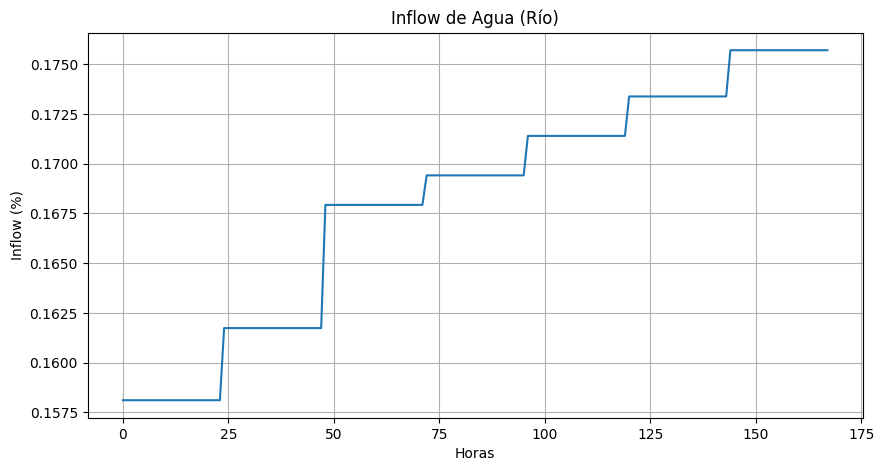

In [19]:
#2) Lectura de datos desde excel de los perfiles de run of river
df_run_of_river = pd.read_excel('excels/run_of_rivers.xlsx', sheet_name=None, engine='openpyxl')
df_hydro_inflows = df_run_of_river["River"]
hydro_inflows = df_hydro_inflows["%"].iloc[:len(hours)].reset_index(drop=True)
#hacemos una grafica de la inflow de agua
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
hydro_inflows.plot()
plt.title("Inflow de Agua (Río)")
plt.xlabel("Horas")
plt.ylabel("Inflow (%)")
plt.grid()
plt.show()



Index(['Demanda_Nacional'], dtype='object', name='name')


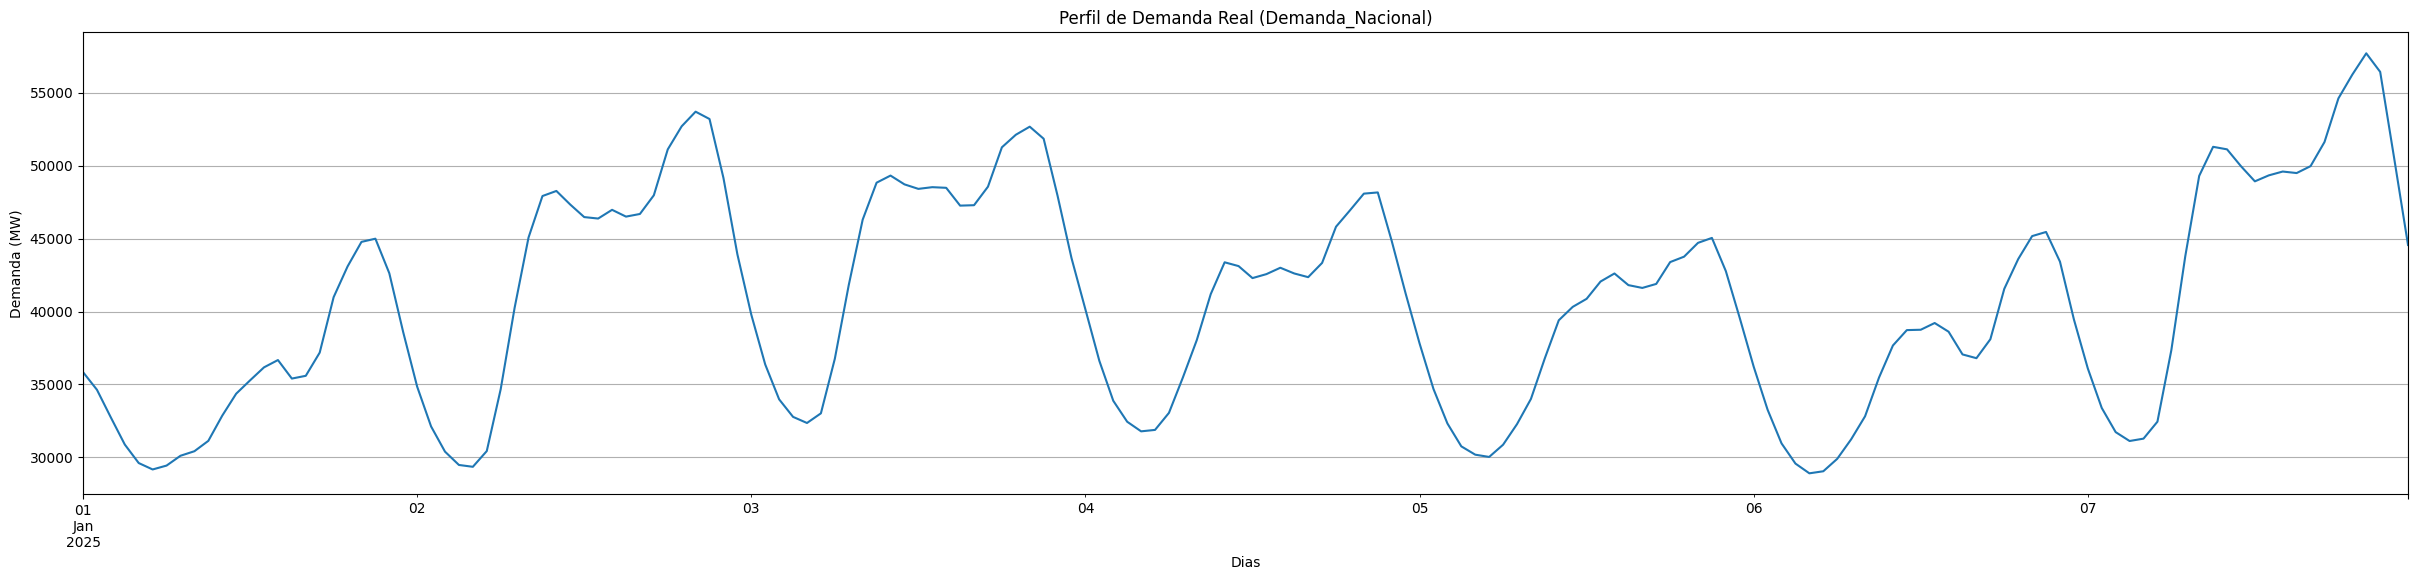

In [20]:
#2) Lectura de datos desde excel del perfil de la demanda horaria
df_demand = pd.read_excel('excels/DemandaReal2040.xlsx',sheet_name='Totales', engine='openpyxl')
# Asegúrate de que el índice sea un rango de fechas
df_demand.index = pd.date_range(start='2025-01-01', periods=168, freq='h')

# 3) Añade la demanda a la red
new_network.add("Load",name="Demanda_Nacional",bus="electricity_Market",p_set=df_demand['DEMANDA REAL 2040'],carrier="Electricity",overwrite=True)
 
import matplotlib.pyplot as plt
 
# Extrae la serie horaria de p_set para tu carga
demand = new_network.loads_t.p_set["Demanda_Nacional"]
 
# Dibuja el perfil
plt.figure(figsize=(30, 6))
demand.plot()
plt.title("Perfil de Demanda Real (Demanda_Nacional)")
#añadimos  etiqueta de dias y horas
plt.xlabel("Dias")
plt.ylabel("Demanda (MW)")
plt.grid(True)
plt.show()

In [21]:
# 2) Añadimos los carriers del excel a la red con un bucle
df_carriers = data["Carriers"]
for _, carrier in df_carriers.iterrows():
    # extrae cada campo desde la fila
  new_network.add("Carrier", carrier["Name"], overwrite=carrier["Overwrite"]  )


# 2) Añadimos los buses del excel a la red con un bucle
df_buses = data["Buses"]
for _, bus in df_buses.iterrows():
    # extrae cada campo desde la fila
  new_network.add("Bus", bus["Name"], carrier=bus["carrier"], overwrite=bus["overwrite"])
  
# 3) Añadimos los Generadores del excel a la red con un bucle
df_generators = data["Generators"]

# Asegúrate de que tus perfiles tienen el mismo índice que la red:
solar_profile.index = hours
wind_profile.index  = hours

for _, gen in df_generators.iterrows():
    # Normalizamos el nombre del carrier para compararlo
    carrier_key = gen["carrier"].strip().lower()

    # Preparamos los argumentos comunes
    gen_kwargs = {
        "bus":           gen["Bus"],
        "p_nom":         gen["p_nom"],
        "marginal_cost": gen["marginal_cost"],
        "carrier":       gen["carrier"],
        "overwrite":     gen["overwrite"]
    }

    # Inyectamos el perfil horario solo si es renovable
    if carrier_key == "solar":
        gen_kwargs["p_max_pu"] = solar_profile
    elif carrier_key == "wind":
        gen_kwargs["p_max_pu"] = wind_profile

    # Inyectamos el horario de inflow de agua solo si es un River
    elif carrier_key == "Water":
        gen_kwargs["p_max_pu"] = hydro_inflows

    # Creamos el generador pasando p_max_pu cuando corresponda
    new_network.add("Generator", gen["Name"], **gen_kwargs)

# Ahora comprueba:
print("Solar p_max_pu:\n", new_network.generators_t.p_max_pu["Solar"].head())
print("Wind  p_max_pu:\n", new_network.generators_t.p_max_pu["Wind"].head())



# 4) Añadimos los links del excel a la red con un bucle
# 4) Añadimos todos los Links de conversión: CCGT, Turbina y Pump
df_links = data["Links"]
for _, lk in df_links.iterrows():
    name = lk["Name"].strip()
    bus0 = lk["Bus 1"].strip()
    bus1 = lk["Bus 2"].strip()

    # Check if buses exist
    if bus0 not in new_network.buses.index:
        raise ValueError(f"Bus '{bus0}' not found in network")
    if bus1 not in new_network.buses.index:
        raise ValueError(f"Bus '{bus1}' not found in network")


for _, lk in df_links.iterrows():
    name      = lk["Name"].strip()
    bus0      = lk["Bus 1"]
    bus1      = lk["Bus 2"]
    p_nom     = lk["p_nom"]
    #p_nom_extendable = lk["p_nom_extendable"]
    capital_cost = lk["capital_cost"]
    eff       = lk["efficiency"]
    mcost     = lk["marginal_cost"]
    carrier   = lk["carrier"]
    overwrite = lk["overwrite"]

    # Para CCGT incluimos además ramp limits
    if name.lower() == "ccgt":
        new_network.add(
            "Link", name,
            bus0=bus0, bus1=bus1,
            p_nom=p_nom, efficiency=eff,
            marginal_cost=mcost, carrier=carrier,
            #p_nom_extendable=p_nom_extendable, 
            capital_cost=capital_cost,
            overwrite=overwrite,
            # ramp_limit_up=lk["Ramp limit up"],
            # ramp_limit_down=lk["Ramp limit down"]
        )

    # Turbina hidroeléctrica (descarga de agua → electricidad)
    elif name.lower() == "turbina":
        new_network.add(
            "Link", name,
            bus0=bus0, bus1=bus1,
            p_nom=p_nom, efficiency=eff,
            marginal_cost=mcost, carrier=carrier,#p_nom_extendable=p_nom_extendable, 
            capital_cost=capital_cost,
            overwrite=overwrite
        )

    # Bomba (electricidad → bombeo de agua)
    elif name.lower() == "pump":
        new_network.add(
            "Link", name,
            bus0=bus0, bus1=bus1,
            p_nom=p_nom, efficiency=eff,
            marginal_cost=mcost, carrier=carrier,
            overwrite=overwrite
        )
    elif name.lower() == "electrolyzer":
        new_network.add(
            "Link", name,
            bus0=bus0, bus1=bus1,
            p_nom=p_nom, efficiency=eff,
            marginal_cost=mcost, carrier=carrier,
            overwrite=overwrite
        )
    print("\n=== Resumen de todos los Links en la red ===")
    print(new_network.links[[
        'bus0','bus1','p_nom','efficiency','marginal_cost','carrier',
        'ramp_limit_up','ramp_limit_down'
    ]])
    for link_name in ["CCGT", "Turbina", "Pump", "Electrolyzer"]:
        if link_name in new_network.links.index:
            row = new_network.links.loc[link_name]
            print(f"\n--- Detalle de {link_name} ---")
            print(f"Origen (bus0):        {row['bus0']}")
            print(f"Destino (bus1):       {row['bus1']}")
            print(f"Capacidad (p_nom):    {row['p_nom']} MW")
            print(f"Eficiencia:           {row['efficiency']*100:.1f}%")
            print(f"Coste marginal:       {row['marginal_cost']} €/MWh")
            print(f"Carrier:              {row['carrier']}")
            # Ramp limits solo para CCGT
            if link_name == "CCGT":
                print(f"Ramp up limit:        {row['ramp_limit_up']} MW/h")
                print(f"Ramp down limit:      {row['ramp_limit_down']} MW/h")
        else:
            print(f"\n⚠️ El link '{link_name}' no se encontró en la red.")

df_store = data["Store"]
print("Type of df_store:", type(df_store))
for _, store in df_store.iterrows():
    new_network.add("Store", store["Name"], bus=store["Bus"], e_nom=store["e_nom"],e_initial=store["e_initial"], e_min_pu=store["e_min_pu"], e_max_pu=store["e_max_pu"],  e_cyclic=store["cyclic_state_of_charge"], capital_cost=store["capital_cost"], marginal_cost=store["marginal_cost"], carrier=store["carrier"],overwrite=store["overwrite"])
    print(f"Store {store['Name']} añadida en bus {store['Bus']}: {store['e_nom']} MWh · inicial {store['e_initial']} MWh · min {store['e_min_pu']} pu · max {store['e_max_pu']} pu · coste marginal {store['marginal_cost']}")

df_storage = data["StorageUnit"]
for _, st in df_storage.iterrows():
    name      = st["Name"].strip()
    bus      = st["Bus"]         # origen de la energía
    p_nom     = st["p_nom"]         # capacidad nominal
    max_hours = st["max_hours"]         # horas máximas de almacenamiento
    efficiency_store = st["efficiency_store"]  # eficiencia de carga
    efficiency_dispatch = st["efficiency_dispatch"]  # eficiencia de descarga
    # e_min_pu = st["e_min_pu"]  # estado de carga mínimo
    # e_max_pu = st["e_max_pu"]  # estado de carga máximo
    marginal_cost = st["marginal_cost"]   # coste marginal
    cyclic_state_of_charge = st["cyclic_state_of_charge"]  # estado de carga cíclico
    state_of_charge_initial=0.5 * st["p_nom"] * st["max_hours"]
    carrier   = st["carrier"]         # etiqueta de carrier
    overwrite = st["overwrite"]       # si sobreescribe parámetros
    # Para CCGT incluimos además ramp limits
    if name.lower() == "hstorage":
        new_network.add(
          "StorageUnit", name= name, bus=bus, p_nom=p_nom*8760, max_hours=max_hours, efficiency_store=efficiency_store, efficiency_dispatch=efficiency_dispatch,
          marginal_cost=marginal_cost, carrier=carrier, overwrite=overwrite
        )

        print(f"StorageUnit {name} añadida en bus {bus}: {p_nom} MW · {max_hours} h y marginal cost {marginal_cost}")
    elif name.lower() == "battery":
        new_network.add(
         "StorageUnit",name= name, bus=bus, p_nom=p_nom, efficiency_store=efficiency_store, efficiency_dispatch=efficiency_dispatch,
          marginal_cost=marginal_cost, cyclic_state_of_charge=cyclic_state_of_charge, carrier=carrier, state_of_charge_initial=0.5 * st["p_nom"] * st["max_hours"], overwrite=overwrite
        )
        print(f"StorageUnit {name} añadida en bus {bus}: {p_nom} MW · {max_hours} h y marginal cost {marginal_cost}")






    # new_network.add("StorageUnit", st["Name"], bus=st["Bus"], p_nom=st["p_nom"],max_hours=st["max_hours"],efficiency_store=st["efficiency_store"],efficiency_dispatch=st["efficiency_dispatch"],marginal_cost=st["marginal_cost"],cyclic_state_of_charge=st["cyclic_state_of_charge"], carrier=st["carrier"],state_of_charge_initial=0.5 * st["p_nom"] * st["max_hours"],overwrite=st["overwrite"])
    #print(f"StorageUnit {st['Name']} añadida en bus {st['Bus']}:"f"{st['p_nom']} MW · {st['max_hours']} h y marginal cost {st['marginal_cost']}")
# 1) construyes una serie constante (o variable) para tu carga de H₂
h2_profile = pd.Series(
    8652.968037,                    # el valor fijo que tenías en la hoja
    index=new_network.snapshots    # idéntico índice de horas
)
# 3) Añadimos la demanda inicial de la red
df_loads = data["Loads"]
for _, loads in df_loads.iterrows():
    # extrae cada campo desde la fila
  new_network.add("Load", loads["Name"], bus=loads["Bus"],p_set=h2_profile, carrier=loads["carrier"], overwrite=loads["overwrite"])

# 1) construyes una serie constante (o variable) para tu carga de H₂
h2_profile = pd.Series(
    8652.968037,                    # el valor fijo que tenías en la hoja
    index=new_network.snapshots    # idéntico índice de horas
)

new_network.optimize(solver_name="highs")





Index(['electricity_Market', 'water_bus'], dtype='object', name='name')
Index(['Water '], dtype='object', name='name')
Index(['Demanda_Nacional', 'Demand'], dtype='object', name='name')


Solar p_max_pu:
 snapshot
2025-01-01 00:00:00    0.0
2025-01-01 01:00:00    0.0
2025-01-01 02:00:00    0.0
2025-01-01 03:00:00    0.0
2025-01-01 04:00:00    0.0
Freq: h, Name: Solar, dtype: float64
Wind  p_max_pu:
 snapshot
2025-01-01 00:00:00    0.618
2025-01-01 01:00:00    0.645
2025-01-01 02:00:00    0.664
2025-01-01 03:00:00    0.661
2025-01-01 04:00:00    0.653
Freq: h, Name: Wind, dtype: float64

=== Resumen de todos los Links en la red ===
         bus0                bus1     p_nom  efficiency  marginal_cost  \
name                                                                     
CCGT  gas_bus  electricity_Market  24559.64        0.58           96.0   

     carrier  ramp_limit_up  ramp_limit_down  
name                                          
CCGT     Gas            NaN              NaN  

--- Detalle de CCGT ---
Origen (bus0):        gas_bus
Destino (bus1):       electricity_Market
Capacidad (p_nom):    24559.64 MW
Eficiencia:           58.0%
Coste marginal:       96.0 

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2856 primals, 6552 duals
Objective: 2.26e+06
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.


('ok', 'optimal')

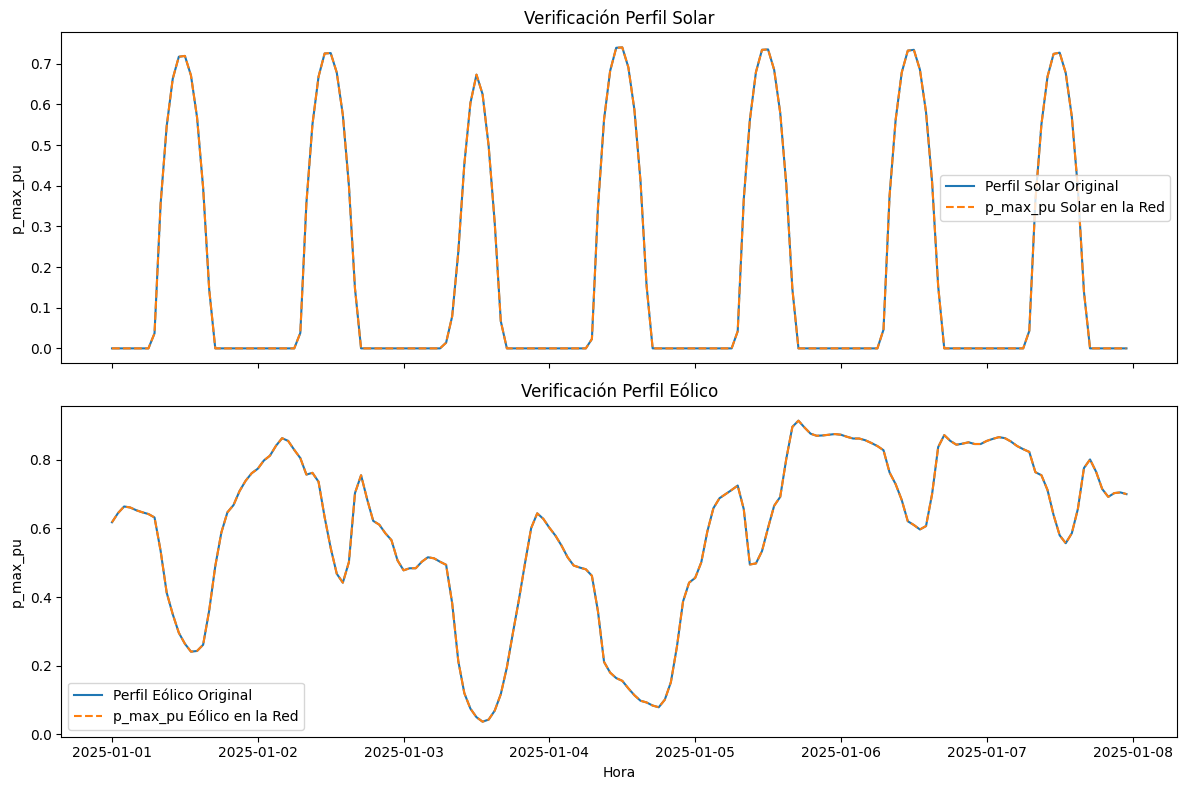

In [22]:
import matplotlib.pyplot as plt

# Extrae las series de p_max_pu desde la red
solar_pm = new_network.generators_t.p_max_pu["Solar"]
wind_pm  = new_network.generators_t.p_max_pu["Wind"]

# Crea la figura con dos subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot Solar
axes[0].plot(solar_profile.index, solar_profile, label="Perfil Solar Original")
axes[0].plot(solar_pm.index,     solar_pm,     linestyle="--", label="p_max_pu Solar en la Red")
axes[0].set_title("Verificación Perfil Solar")
axes[0].set_ylabel("p_max_pu")
axes[0].legend()

# Plot Wind
axes[1].plot(wind_profile.index, wind_profile, label="Perfil Eólico Original")
axes[1].plot(wind_pm.index,      wind_pm,      linestyle="--", label="p_max_pu Eólico en la Red")
axes[1].set_title("Verificación Perfil Eólico")
axes[1].set_xlabel("Hora")
axes[1].set_ylabel("p_max_pu")
axes[1].legend()

plt.tight_layout()
plt.show()

In [23]:
# ---- Debug rápido ----
print("=== Carriers ===")
print(new_network.carriers)

print("\n=== Buses ===")
print(new_network.buses)

print("\n=== Loads ===")
print(new_network.loads[['bus','p_set']])

print("\n=== Generators ===")
print(new_network.generators[['bus','marginal_cost','p_nom']])

print("\n=== Links ===")
print(new_network.links[['bus0','bus1','marginal_cost','p_nom']])

# Chequea flujo previo
print("\n=== Flujos previos (t=0) ===")
print(" Generator p:", new_network.generators_t.p.iloc[0])
print(" Link p0:",     new_network.links_t.p0.iloc[0])
print(" Load p:",      new_network.loads_t.p_set.iloc[0])


print("\n--- GENERATORS ---")
print(new_network.generators[["p_nom", "marginal_cost", "capital_cost"]])

print("\n--- LINKS ---")
print(new_network.links[["p_nom", "marginal_cost", "capital_cost"]])
# -----------------------



=== Carriers ===
             co2_emissions color nice_name  max_growth  max_relative_growth
name                                                                       
AC                     0.0                         inf                  0.0
Water                  0.0                         inf                  0.0
Wind                   0.0                         inf                  0.0
Gas                    0.0                         inf                  0.0
Solar                  0.0                         inf                  0.0
Grid_Import            0.0                         inf                  0.0
Biomass                0.0                         inf                  0.0
Hydrogen               0.0                         inf                  0.0

=== Buses ===
                    v_nom type    x    y      carrier unit location  \
name                                                                  
electricity_Market    1.0       0.0  0.0  Electricity             

 Generator p: name
Solar         -0.000000
Wind       60568.720533
Biomass       -0.000000
Gas           -0.000000
Water         -0.000000
Name: 2025-01-01 00:00:00, dtype: float64
Link p0: name
CCGT               -0.00000
Turbina            -0.00000
Pump               -0.00000
Electrolyzer    24722.76582
Name: 2025-01-01 00:00:00, dtype: float64
Link p1: name
CCGT                0.000000
Turbina             0.000000
Pump                0.000000
Electrolyzer   -17305.936074
Name: 2025-01-01 00:00:00, dtype: float64
 Load p: name
Demanda_Nacional    35845.954713
Demand               8652.968037
Name: 2025-01-01 00:00:00, dtype: float64


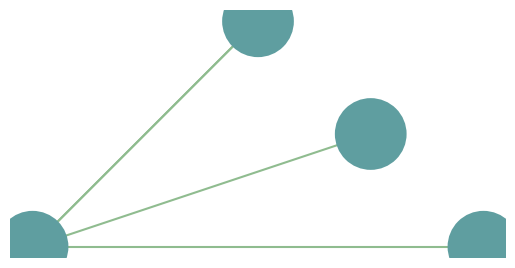

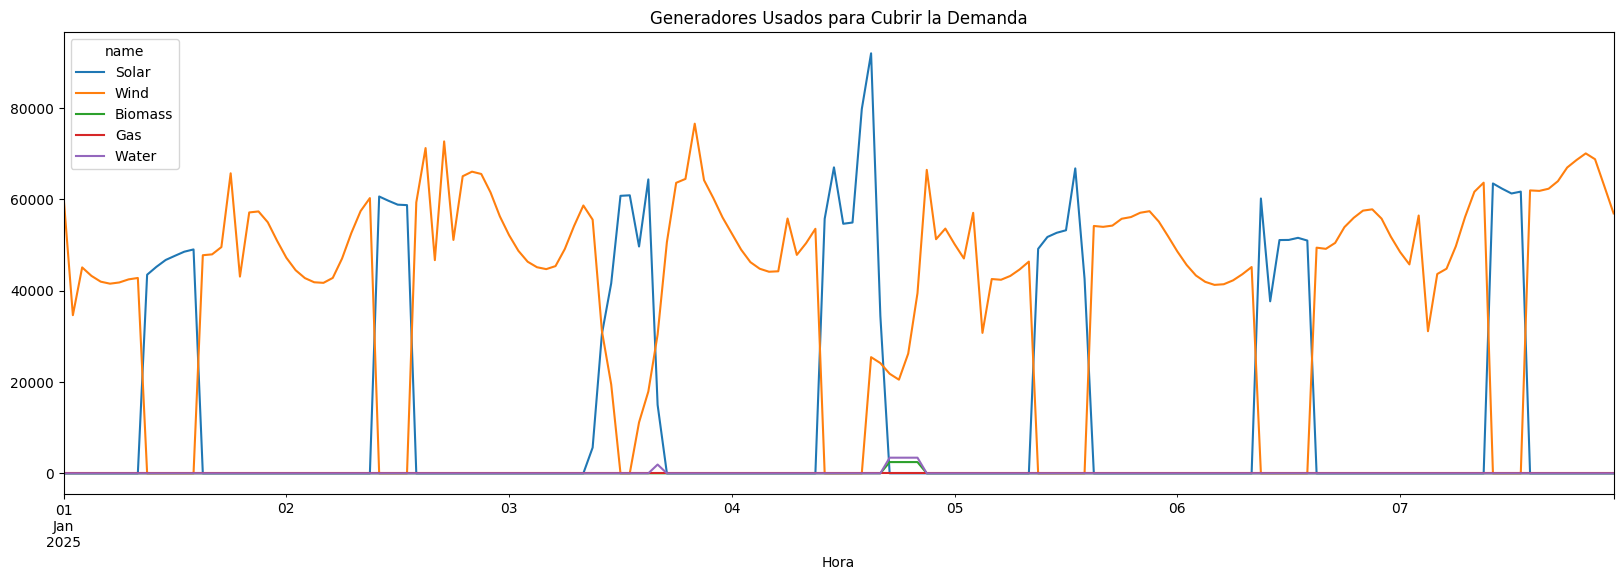

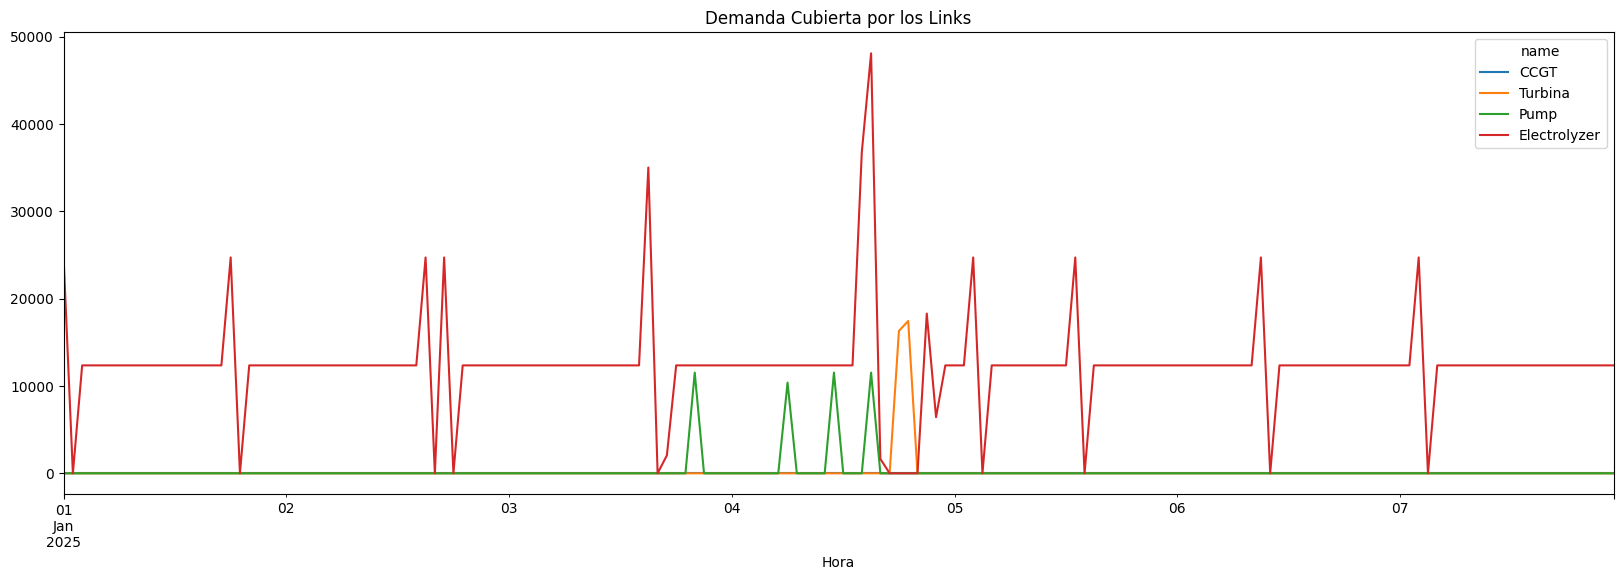

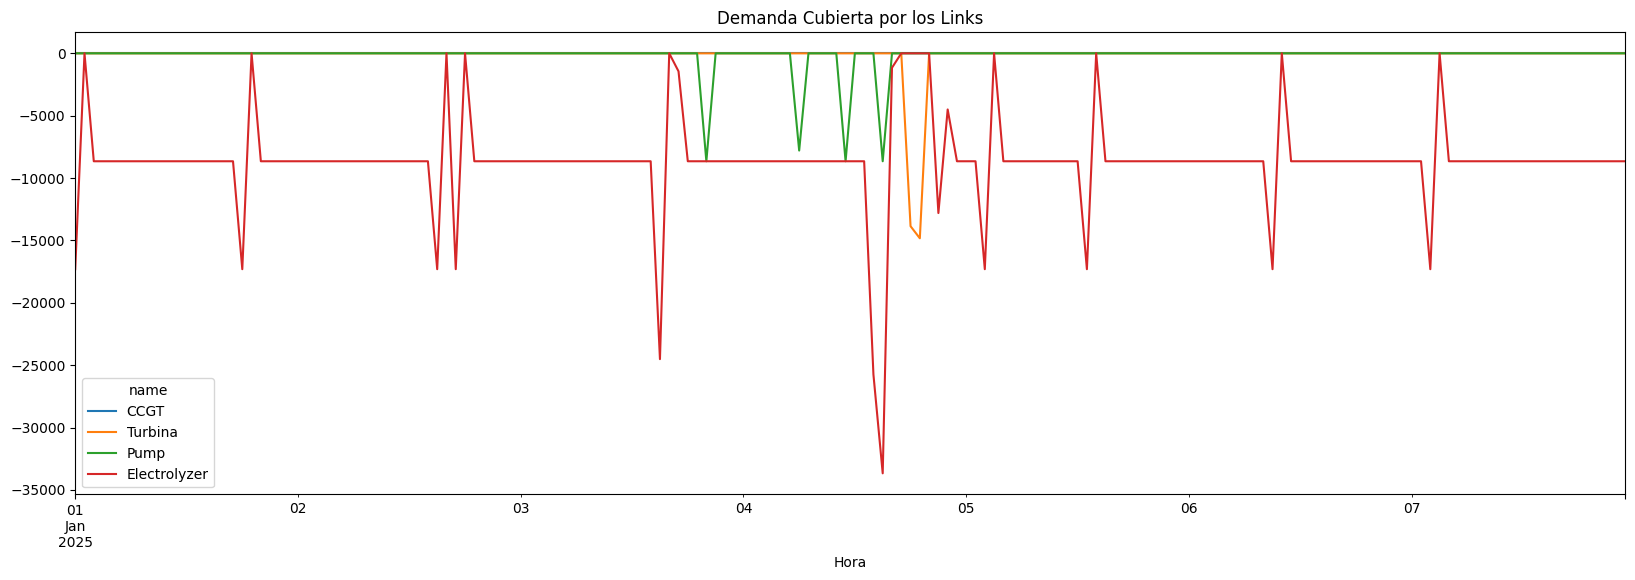

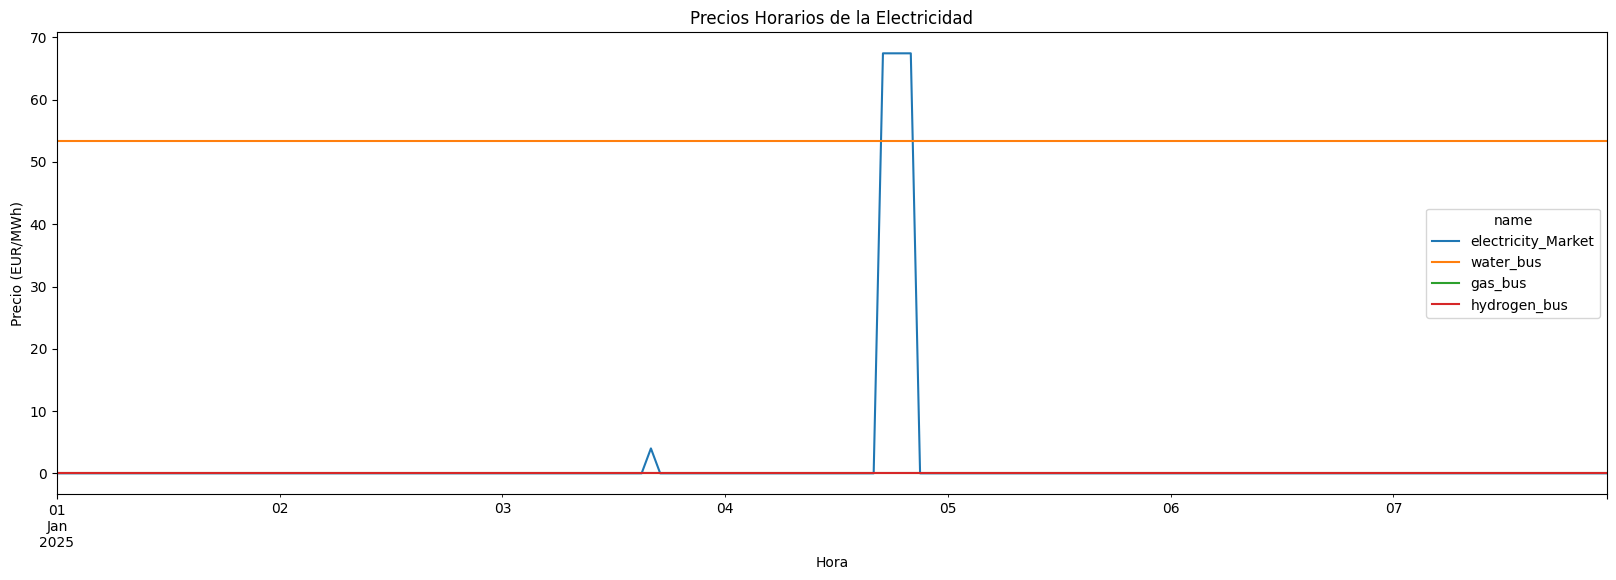


=== Precios Horarios de la Electricidad ===
name                 electricity_Market  water_bus  gas_bus  hydrogen_bus
snapshot                                                                 
2025-01-01 00:00:00                -0.0  53.333333     -0.0          -0.0
2025-01-01 01:00:00                -0.0  53.333333     -0.0          -0.0
2025-01-01 02:00:00                -0.0  53.333333     -0.0          -0.0
2025-01-01 03:00:00                -0.0  53.333333     -0.0          -0.0
2025-01-01 04:00:00                -0.0  53.333333     -0.0          -0.0

=== Producción Horaria de cada Generador ===

=== Producción de cada Generador ===
name                 Solar          Wind  Biomass  Gas  Water 
snapshot                                                      
2025-01-01 00:00:00   -0.0  60568.720533     -0.0 -0.0    -0.0
2025-01-01 01:00:00   -0.0  34636.421896     -0.0 -0.0    -0.0
2025-01-01 02:00:00   -0.0  45096.744298     -0.0 -0.0    -0.0
2025-01-01 03:00:00   -0.0  43242.9082

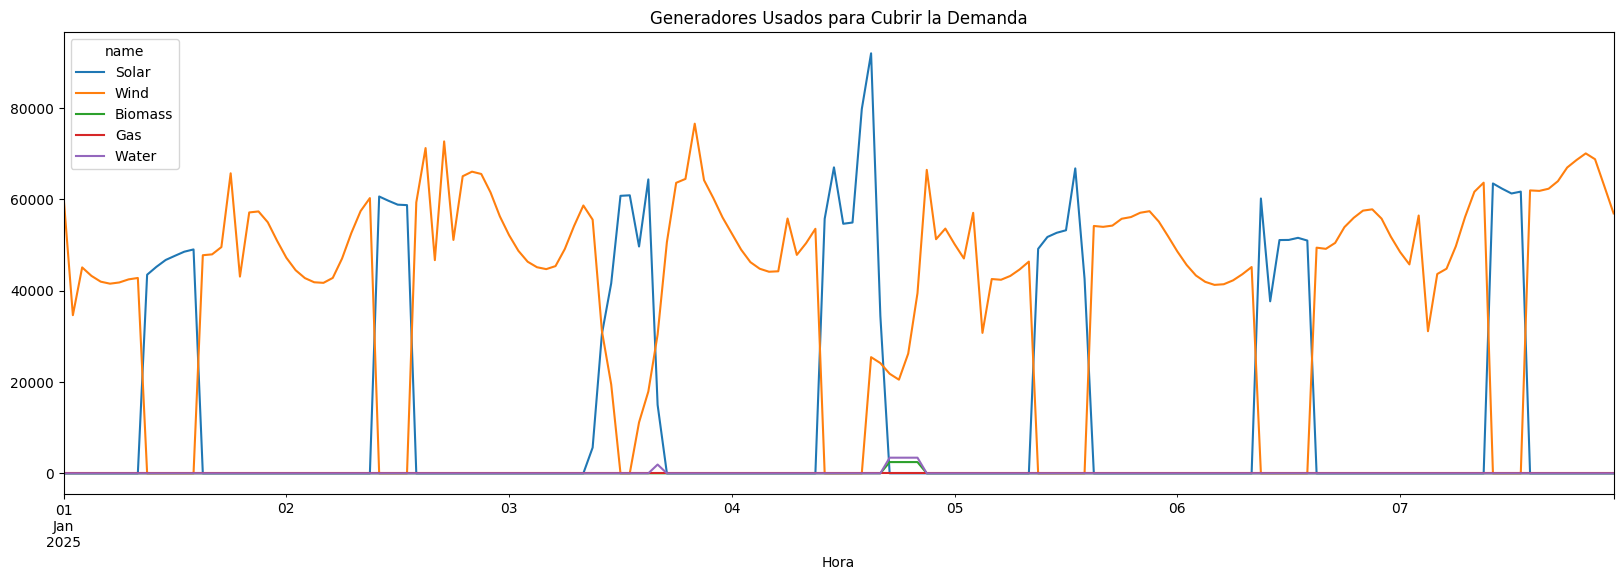

In [24]:

#chuqueamos el uso de los generadores y links
print(" Generator p:", new_network.generators_t.p.iloc[0])
print("Link p0:",     new_network.links_t.p0.iloc[0])
print("Link p1:",     new_network.links_t.p1.iloc[0])
print(" Load p:",      new_network.loads_t.p_set.iloc[0])
#graficamos los resultados de la optimización
new_network.plot()
#graficamos el uso de los generadores y links para cubrir la demanda
new_network.generators_t.p.plot(figsize=(20, 6), title="Generadores Usados para Cubrir la Demanda")
plt.xlabel("Hora")
plt.show()
#graficamos la demanda cubierta por los links
new_network.links_t.p0.plot(figsize=(20, 6), title="Demanda Cubierta por los Links")
plt.xlabel("Hora")
plt.show()
new_network.links_t.p1.plot(figsize=(20, 6), title="Demanda Cubierta por los Links")
plt.xlabel("Hora")
plt.show()
#graficamos los precios horarios de la electricidad
new_network.buses_t.marginal_price.plot(figsize=(20, 6), title="Precios Horarios de la Electricidad")
plt.xlabel("Hora")
plt.ylabel("Precio (EUR/MWh)")
plt.show()

#mostramos los precios horarios de la electricidad
print("\n=== Precios Horarios de la Electricidad ===")
print(new_network.buses_t.marginal_price.head())

#mostramos la produccion horaria de cada generador
print("\n=== Producción Horaria de cada Generador ===")
print("\n=== Producción de cada Generador ===")
print(new_network.generators_t.p.head())
#mostramos la produccion de cada link
print("\n=== Producción de cada Link ===")
print(new_network.links_t.p0.head())
print(new_network.links_t.p1.head())
#graficamos el uso del storage unit
#graficamos el uso de los generadores y baterias para cubrir la demanda
new_network.generators_t.p.plot(figsize=(20, 6), title="Generadores Usados para Cubrir la Demanda")
plt.xlabel("Hora")
plt.show()





In [25]:

import pandas as pd

# 1) Recuperar precios sombra por bus
bus_mp = new_network.buses_t.marginal_price

# 2) Precios por Generador
gen_price = pd.DataFrame(
    {gen: bus_mp[new_network.generators.loc[gen, "bus"]]
     for gen in new_network.generators.index},
    index=bus_mp.index
)

# 3) Precios por Link
link_price = pd.DataFrame(
    {lk: bus_mp[new_network.links.loc[lk, "bus1"]]
     for lk in new_network.links.index},
    index=bus_mp.index
)

# 4) Concatena ambos DataFrames
full_table = pd.concat([gen_price, link_price], axis=1)

# 5) Muéstralo sin ace_tools
print("=== Precios Marginales por Generador y Link ===")
print(full_table.head())


=== Precios Marginales por Generador y Link ===
                     Solar  Wind  Biomass  Gas  Water   CCGT  Turbina  \
snapshot                                                                
2025-01-01 00:00:00   -0.0  -0.0     -0.0 -0.0    -0.0  -0.0     -0.0   
2025-01-01 01:00:00   -0.0  -0.0     -0.0 -0.0    -0.0  -0.0     -0.0   
2025-01-01 02:00:00   -0.0  -0.0     -0.0 -0.0    -0.0  -0.0     -0.0   
2025-01-01 03:00:00   -0.0  -0.0     -0.0 -0.0    -0.0  -0.0     -0.0   
2025-01-01 04:00:00   -0.0  -0.0     -0.0 -0.0    -0.0  -0.0     -0.0   

                          Pump  Electrolyzer  
snapshot                                      
2025-01-01 00:00:00  53.333333          -0.0  
2025-01-01 01:00:00  53.333333          -0.0  
2025-01-01 02:00:00  53.333333          -0.0  
2025-01-01 03:00:00  53.333333          -0.0  
2025-01-01 04:00:00  53.333333          -0.0  


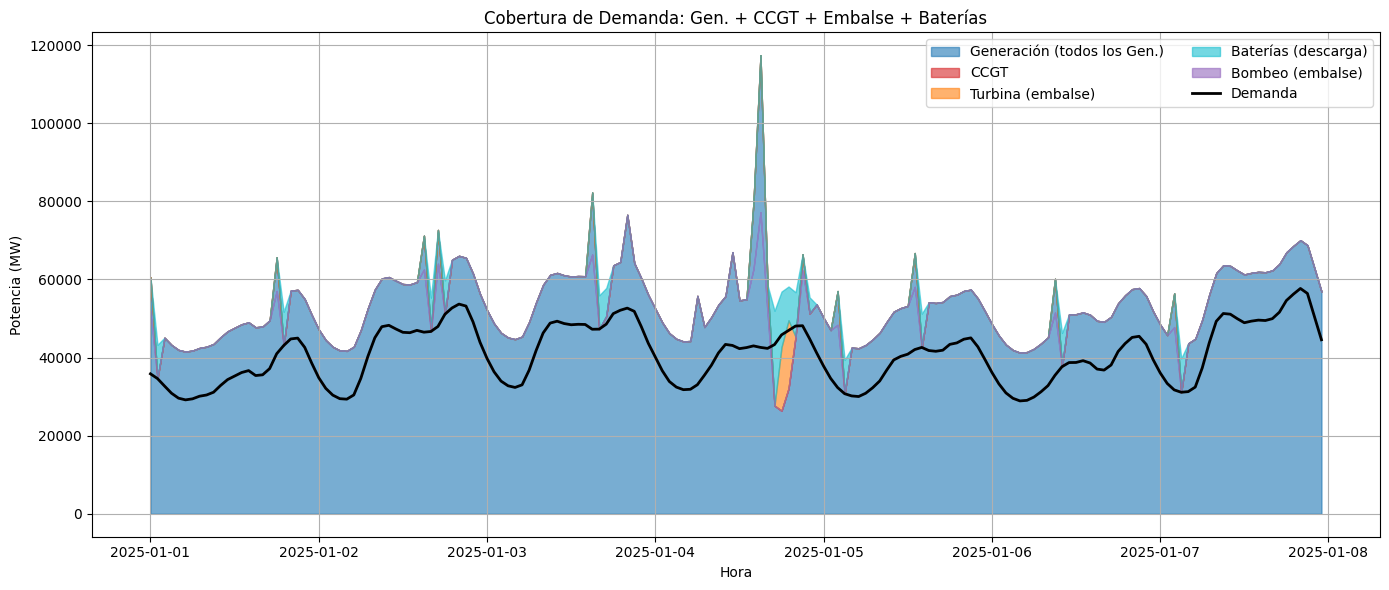

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# ─── 1. Extrae las series horarias ────────────────────────────────────────────
times   = new_network.snapshots

# 1a. Generación total (p de todos los generators)
gen     = new_network.generators_t.p.sum(axis=1)

# 1b. Flujos de cada link productor/consumidor
#     - CCGT y Turbina inyectan MW en electricity_Market: usamos p0 (positivo)
ccgt     = new_network.links_t.p0["CCGT"].clip(lower=0)
turb     = new_network.links_t.p0["Turbina"].clip(lower=0)
#     - Pump extrae MW de electricity_Market para bombeo: usamos p1 (positivo)
pump     = new_network.links_t.p1["Pump"].clip(lower=0)

# 1c. Baterías neto
bat_net  = new_network.storage_units_t.p.sum(axis=1)
bat_dis  = bat_net.clip(lower=0)        # descarga
bat_ch   = (-bat_net).clip(lower=0)     # carga

# 1d. Demanda
dmd      = new_network.loads_t.p_set["Demanda_Nacional"]

# ─── 2. Calcula los límites de cobertura ──────────────────────────────────────
# 2a. Primero con sólo renovables+CCGT+Turbina
lim1 = gen + ccgt + turb

# 2b. Añade descarga de baterías
lim2 = lim1 + bat_dis

# 2c. Añade bombeo (por debajo de la generación+baterías)
lim0 = gen - bat_ch - pump

# ─── 3. Dibujo apilado ─────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(14,6))

# 3.1 Renovables + generadores convencionales (La base azul)
ax.fill_between(times, 0, gen,
                label="Generación (todos los Gen.)",
                color="tab:blue", alpha=0.6)

# 3.2 CCGT (rojo)
ax.fill_between(times, gen, gen+ccgt,
                label="CCGT",
                color="tab:red", alpha=0.6)

# 3.3 Turbina del embalse (naranja)
ax.fill_between(times,
                gen+ccgt,
                gen+ccgt+turb,
                label="Turbina (embalse)",
                color="tab:orange", alpha=0.6)

# 3.4 Descarga de baterías (azul claro)
bottom_bat = gen+ccgt+turb
ax.fill_between(times,
                bottom_bat,
                bottom_bat+bat_dis,
                label="Baterías (descarga)",
                color="tab:cyan", alpha=0.6)

# 3.5 Bombeo del embalse (violeta, por debajo de la generación)
ax.fill_between(times,
                gen - bat_ch - pump,
                gen - bat_ch,
                label="Bombeo (embalse)",
                color="tab:purple", alpha=0.6)

# 3.6 Demanda (línea negra)
ax.plot(times, dmd,
        label="Demanda", color="k", linewidth=2, zorder=10)

# ─── 4. Etiquetas y estilo ────────────────────────────────────────────────────
ax.set_xlabel("Hora")
ax.set_ylabel("Potencia (MW)")
ax.set_title("Cobertura de Demanda: Gen. + CCGT + Embalse + Baterías")
ax.legend(loc="upper right", ncol=2)
ax.grid(True)
fig.tight_layout()
plt.show()



C:\Users\EXT10348\AppData\Local\Temp\ipykernel_11352\332939998.py:8: FutureWarning:

Hour.delta is deprecated and will be removed in a future version. Use pd.Timedelta(obj) instead

C:\Users\EXT10348\AppData\Local\Temp\ipykernel_11352\332939998.py:10: FutureWarning:

Hour.delta is deprecated and will be removed in a future version. Use pd.Timedelta(obj) instead



Energía producida por turbina: 33750 MWh
Pico de potencia: 17445 MW
Horas de operación: 2 h


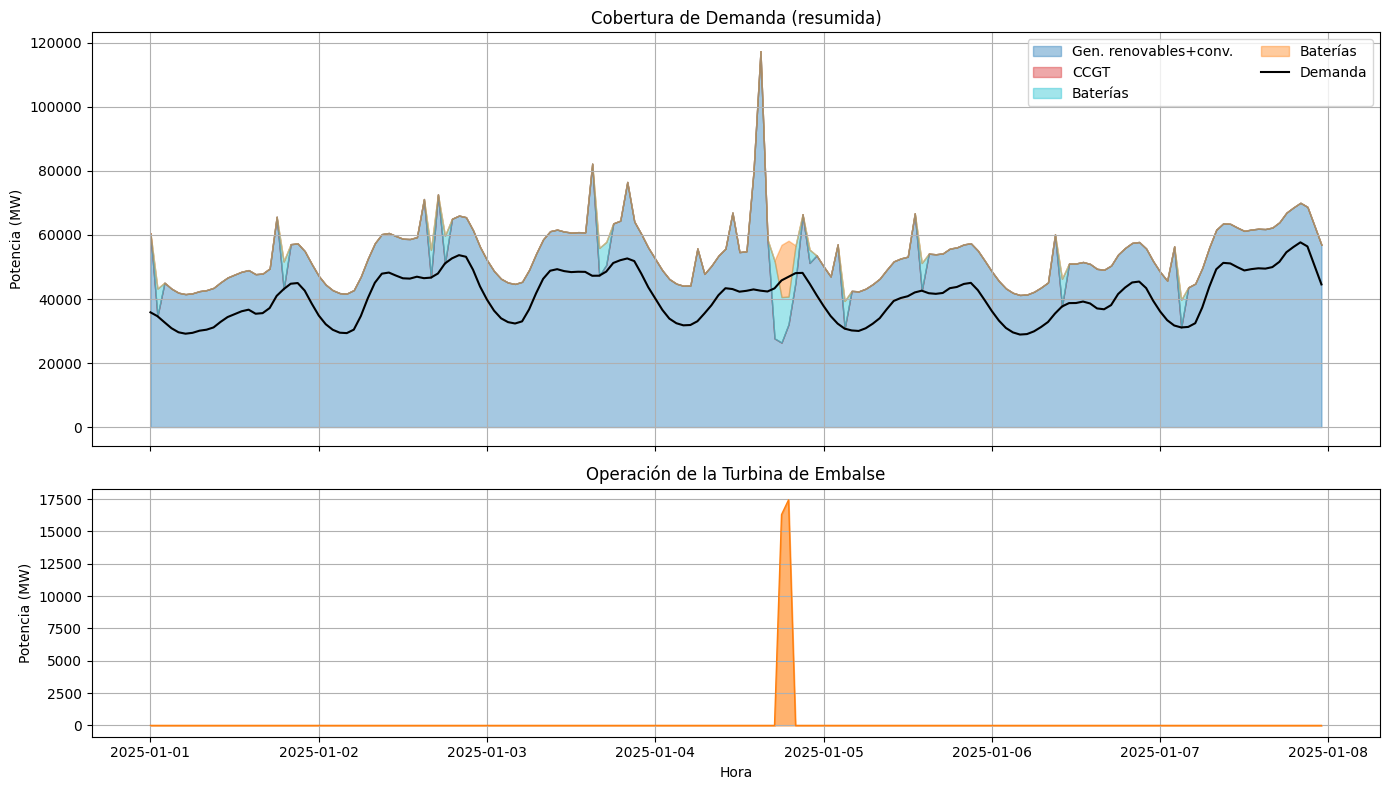

                    time          local_time  electricity  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13
0    2019-01-01 00:00:00 2019-01-01 01:00:00        0.618         NaN         NaN         NaN         NaN         NaN         NaN         NaN          NaN          NaN          NaN          NaN
1    2019-01-01 01:00:00 2019-01-01 02:00:00        0.645         NaN         NaN         NaN         NaN         NaN         NaN         NaN          NaN          NaN          NaN          NaN
2    2019-01-01 02:00:00 2019-01-01 03:00:00        0.664         NaN         NaN         NaN         NaN         NaN         NaN         NaN          NaN          NaN          NaN          NaN
3    2019-01-01 03:00:00 2019-01-01 04:00:00        0.661         NaN         NaN         NaN         NaN         NaN         NaN         NaN          NaN          NaN          NaN          NaN
4    2019-01-01 04:00:00 2019-

In [27]:
import matplotlib.pyplot as plt

# Extraemos sólo la serie de turbinas
times = new_network.snapshots
turb = new_network.links_t.p0["Turbina"].clip(lower=0)

# (Opcional) Cálculo de métricas de operación
total_energy = turb.sum() * (times.freq.delta / np.timedelta64(1, 'h'))  # MWh totales
peak_power   = turb.max()  # MW pico
operation_hours = (turb > 0).sum() * (times.freq.delta / np.timedelta64(1, 'h'))

print(f"Energía producida por turbina: {total_energy:.0f} MWh")
print(f"Pico de potencia: {peak_power:.0f} MW")
print(f"Horas de operación: {operation_hours:.0f} h")

# Dibujar dos subplots: cobertura general + detalle turbina
fig, (ax_cov, ax_turb) = plt.subplots(2,1, figsize=(14,8), sharex=True,
                                      gridspec_kw={"height_ratios":[1,0.6]})

# 1) Cobertura completa (como en tu gráfico original, pero reducida)
gen = new_network.generators_t.p.sum(axis=1)
ccgt = new_network.links_t.p0["CCGT"].clip(lower=0)
bat_dis = new_network.storage_units_t.p.sum(axis=1).clip(lower=0)
dmd = new_network.loads_t.p_set["Demanda_Nacional"]

ax_cov.fill_between(times, 0, gen,     label="Gen. renovables+conv.", color="tab:blue", alpha=0.4)
ax_cov.fill_between(times, gen, gen+ccgt,               label="CCGT",     color="tab:red", alpha=0.4)
ax_cov.fill_between(times, gen+ccgt, gen+ccgt+bat_dis,   label="Baterías", color="tab:cyan", alpha=0.4)
ax_cov.fill_between(times,  gen+ccgt+bat_dis, gen+ccgt+bat_dis+ turb,   label="Baterías", color="tab:orange", alpha=0.4)
ax_cov.plot(times, dmd, color="k", linewidth=1.5, label="Demanda")
ax_cov.set_ylabel("Potencia (MW)")
ax_cov.set_title("Cobertura de Demanda (resumida)")
ax_cov.legend(loc="upper right", ncol=2)
ax_cov.grid(True)

# 2) Detalle de la turbina
ax_turb.fill_between(times, 0, turb, label="Turbina (embalse)", color="tab:orange", alpha=0.6)
ax_turb.plot(times, turb, color="tab:orange", linewidth=1)
ax_turb.set_xlabel("Hora")
ax_turb.set_ylabel("Potencia (MW)")
ax_turb.set_title("Operación de la Turbina de Embalse")
ax_turb.grid(True)

fig.tight_layout()
plt.show()

import pandas as pd

# (Repite aquí la creación de tu df de 3 filas × 168 columnas)
# ren_ccgt = gen + ccgt
# turb     = new_network.links_t.p0["Turbina"].clip(lower=0)
# unmet    = (dmd - ren_ccgt).clip(lower=0)
# df = pd.DataFrame([ren_ccgt.values, turb.values, unmet.values],
#                   index=["Ren+CCGT","Turbina","No cubierta"],
#                   columns=times)

# Fuerza a pandas a imprimir todas las columnas
pd.set_option('display.max_columns', None)    # Sin límite en número de columnas
pd.set_option('display.width', 2000)          # Ancho de línea amplio

print(df)

df_T = df.T   # Ahora tiene 168 filas × 3 columnas
pd.set_option('display.max_rows', None)      # Sin límite en número de filas       # Ajusta si es necesario
print(df_T)




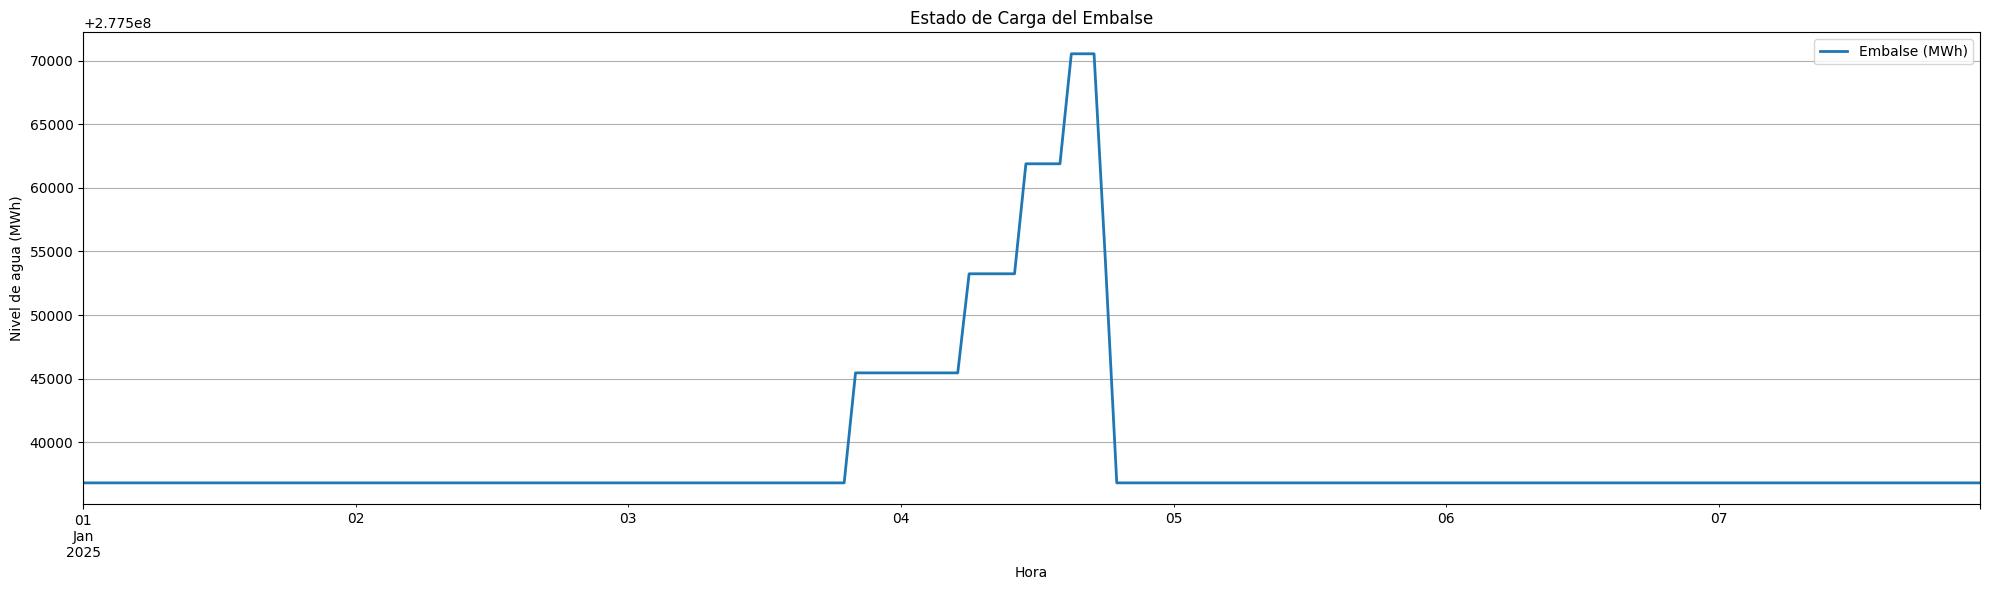

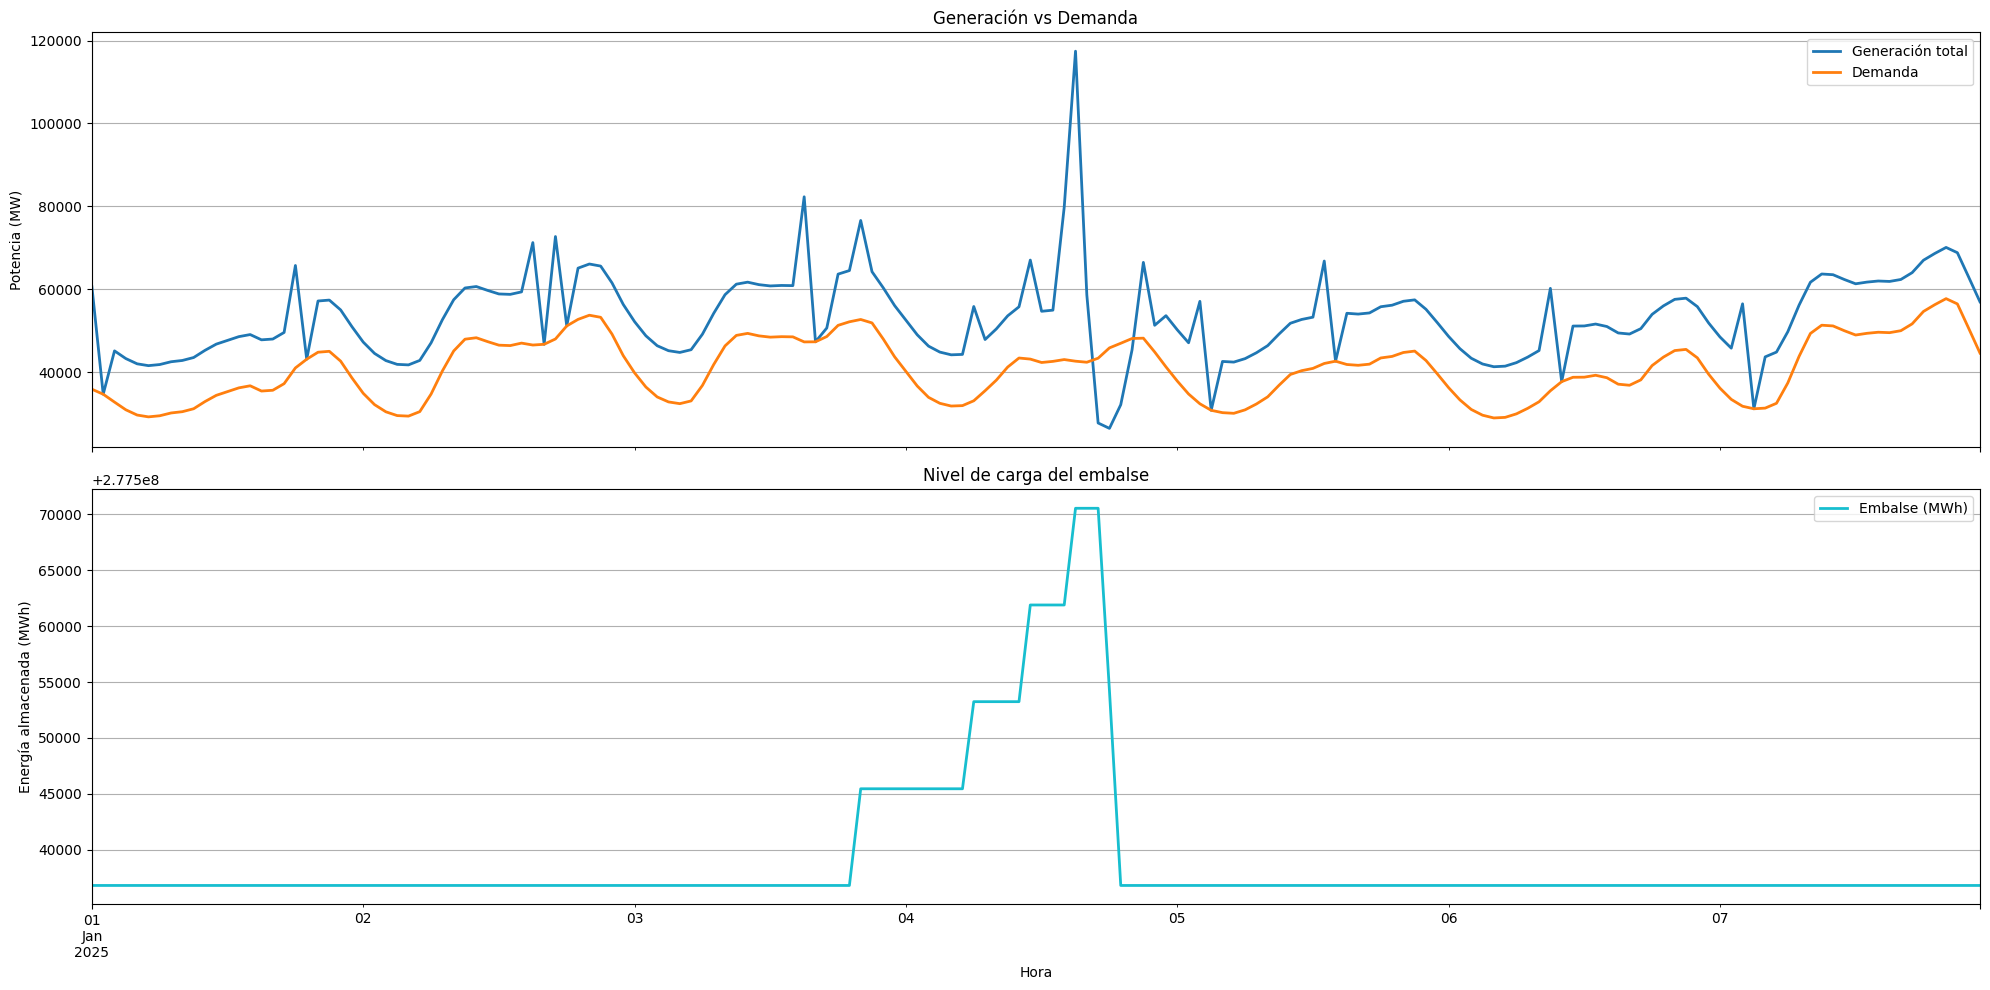

In [28]:
import matplotlib.pyplot as plt

# 1) Grafica el nivel del embalse en MWh
ax = new_network.stores_t.e["Embalse"].plot(
    figsize=(20,6),
    title="Estado de Carga del Embalse",
    linewidth=2,
    label="Embalse (MWh)"
)
ax.set_xlabel("Hora")
ax.set_ylabel("Nivel de agua (MWh)")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2) Para verlo junto a la generación
fig, ax = plt.subplots(2,1,figsize=(20,10), sharex=True)

# 2a. Generación total y demanda
new_network.generators_t.p.sum(axis=1).plot(
    ax=ax[0],
    linewidth=2,
    label="Generación total"
)
new_network.loads_t.p_set["Demanda_Nacional"].plot(
    ax=ax[0],
    linewidth=2,
    label="Demanda"
)
ax[0].set_title("Generación vs Demanda")
ax[0].set_ylabel("Potencia (MW)")
ax[0].legend()
ax[0].grid(True)

# 2b. Nivel del embalse
new_network.stores_t.e["Embalse"].plot(
    ax=ax[1],
    color="tab:cyan",
    linewidth=2,
    label="Embalse (MWh)"
)
ax[1].set_title("Nivel de carga del embalse")
ax[1].set_xlabel("Hora")
ax[1].set_ylabel("Energía almacenada (MWh)")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()




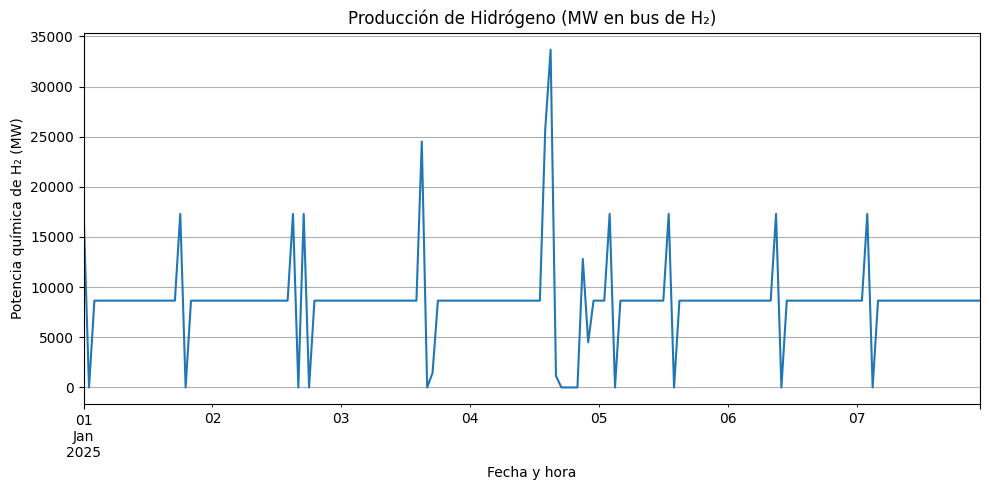

In [29]:
import matplotlib.pyplot as plt

# Tasa de producción de H₂ en MW
hydro_prod = new_network.links_t.p1["Electrolyzer"].clip(upper=0) * -1

hydro_prod.plot(figsize=(10, 5))
plt.title("Producción de Hidrógeno (MW en bus de H₂)")
plt.xlabel("Fecha y hora")
plt.ylabel("Potencia química de H₂ (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.show()


C:\Users\EXT10348\AppData\Local\Temp\ipykernel_11352\866677412.py:8: FutureWarning:

Hour.delta is deprecated and will be removed in a future version. Use pd.Timedelta(obj) instead

C:\Users\EXT10348\AppData\Local\Temp\ipykernel_11352\866677412.py:10: FutureWarning:

Hour.delta is deprecated and will be removed in a future version. Use pd.Timedelta(obj) instead



Energía producida por turbina: 33750 MWh
Pico de potencia: 17445 MW
Horas de operación: 2 h


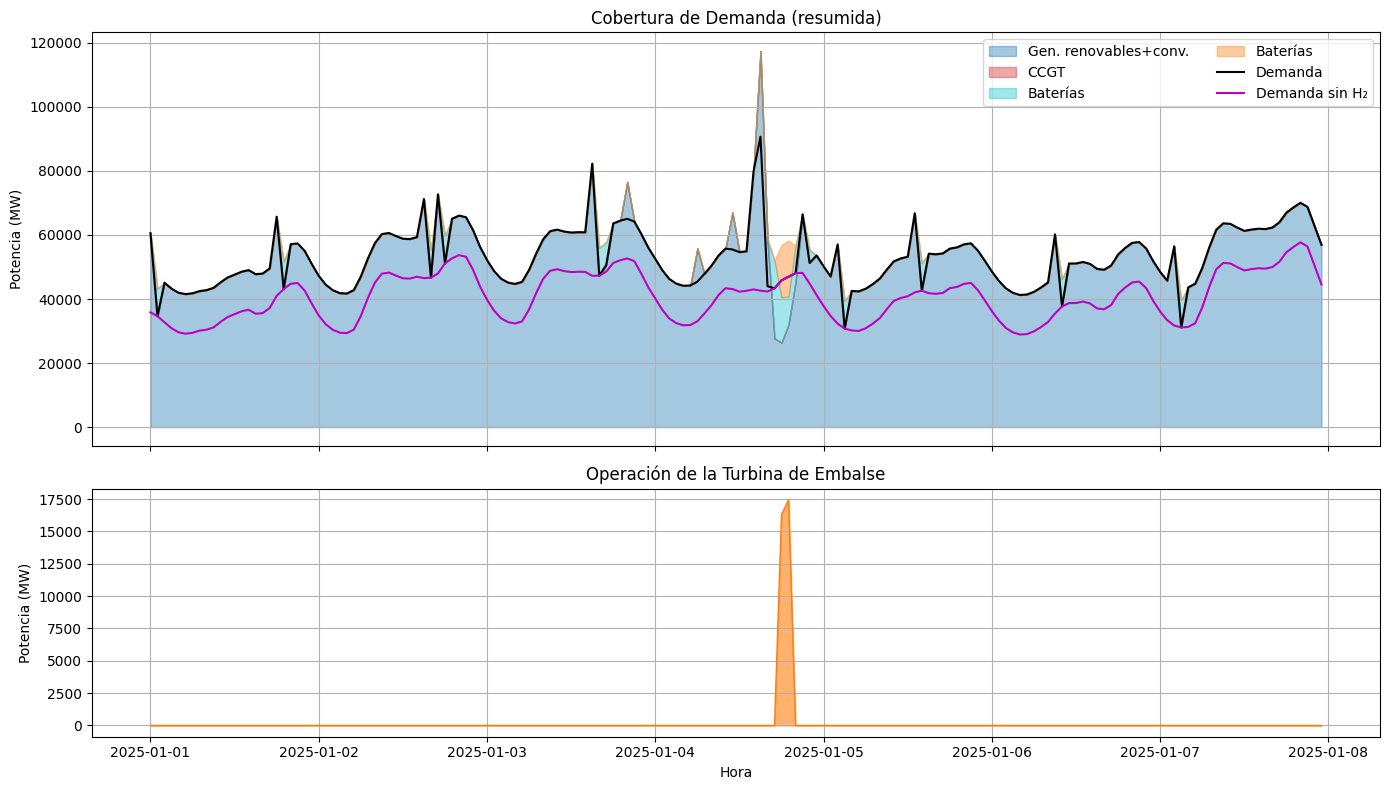

                    time          local_time  electricity  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13
0    2019-01-01 00:00:00 2019-01-01 01:00:00        0.618         NaN         NaN         NaN         NaN         NaN         NaN         NaN          NaN          NaN          NaN          NaN
1    2019-01-01 01:00:00 2019-01-01 02:00:00        0.645         NaN         NaN         NaN         NaN         NaN         NaN         NaN          NaN          NaN          NaN          NaN
2    2019-01-01 02:00:00 2019-01-01 03:00:00        0.664         NaN         NaN         NaN         NaN         NaN         NaN         NaN          NaN          NaN          NaN          NaN
3    2019-01-01 03:00:00 2019-01-01 04:00:00        0.661         NaN         NaN         NaN         NaN         NaN         NaN         NaN          NaN          NaN          NaN          NaN
4    2019-01-01 04:00:00 2019-

In [30]:
import matplotlib.pyplot as plt

# Extraemos sólo la serie de turbinas
times = new_network.snapshots
turb = new_network.links_t.p0["Turbina"].clip(lower=0)

# (Opcional) Cálculo de métricas de operación
total_energy = turb.sum() * (times.freq.delta / np.timedelta64(1, 'h'))  # MWh totales
peak_power   = turb.max()  # MW pico
operation_hours = (turb > 0).sum() * (times.freq.delta / np.timedelta64(1, 'h'))

print(f"Energía producida por turbina: {total_energy:.0f} MWh")
print(f"Pico de potencia: {peak_power:.0f} MW")
print(f"Horas de operación: {operation_hours:.0f} h")

# Dibujar dos subplots: cobertura general + detalle turbina
fig, (ax_cov, ax_turb) = plt.subplots(2,1, figsize=(14,8), sharex=True,
                                      gridspec_kw={"height_ratios":[1,0.6]})

# 1) Cobertura completa (como en tu gráfico original, pero reducida)
gen = new_network.generators_t.p.sum(axis=1)
ccgt = new_network.links_t.p0["CCGT"].clip(lower=0)
bat_dis = new_network.storage_units_t.p.sum(axis=1).clip(lower=0)
dmd = new_network.loads_t.p_set["Demanda_Nacional"]
dme2=new_network.links_t.p0["Electrolyzer"].clip(lower=0)

ax_cov.fill_between(times, 0, gen,     label="Gen. renovables+conv.", color="tab:blue", alpha=0.4)
ax_cov.fill_between(times, gen, gen+ccgt,               label="CCGT",     color="tab:red", alpha=0.4)
ax_cov.fill_between(times, gen+ccgt, gen+ccgt+bat_dis,   label="Baterías", color="tab:cyan", alpha=0.4)
ax_cov.fill_between(times,  gen+ccgt+bat_dis, gen+ccgt+bat_dis+ turb,   label="Baterías", color="tab:orange", alpha=0.4)
ax_cov.plot(times, dmd+dme2, color="k", linewidth=1.5, label="Demanda")
ax_cov.plot(times, dmd, color="m", linewidth=1.5, label="Demanda sin H₂")
ax_cov.set_ylabel("Potencia (MW)")
ax_cov.set_title("Cobertura de Demanda (resumida)")
ax_cov.legend(loc="upper right", ncol=2)
ax_cov.grid(True)

# 2) Detalle de la turbina
ax_turb.fill_between(times, 0, turb, label="Turbina (embalse)", color="tab:orange", alpha=0.6)
ax_turb.plot(times, turb, color="tab:orange", linewidth=1)
ax_turb.set_xlabel("Hora")
ax_turb.set_ylabel("Potencia (MW)")
ax_turb.set_title("Operación de la Turbina de Embalse")
ax_turb.grid(True)

fig.tight_layout()
plt.show()

import pandas as pd

# (Repite aquí la creación de tu df de 3 filas × 168 columnas)
# ren_ccgt = gen + ccgt
# turb     = new_network.links_t.p0["Turbina"].clip(lower=0)
# unmet    = (dmd - ren_ccgt).clip(lower=0)
# df = pd.DataFrame([ren_ccgt.values, turb.values, unmet.values],
#                   index=["Ren+CCGT","Turbina","No cubierta"],
#                   columns=times)

# Fuerza a pandas a imprimir todas las columnas
pd.set_option('display.max_columns', None)    # Sin límite en número de columnas
pd.set_option('display.width', 2000)          # Ancho de línea amplio

print(df)

df_T = df.T   # Ahora tiene 168 filas × 3 columnas
pd.set_option('display.max_rows', None)      # Sin límite en número de filas       # Ajusta si es necesario
print(df_T)


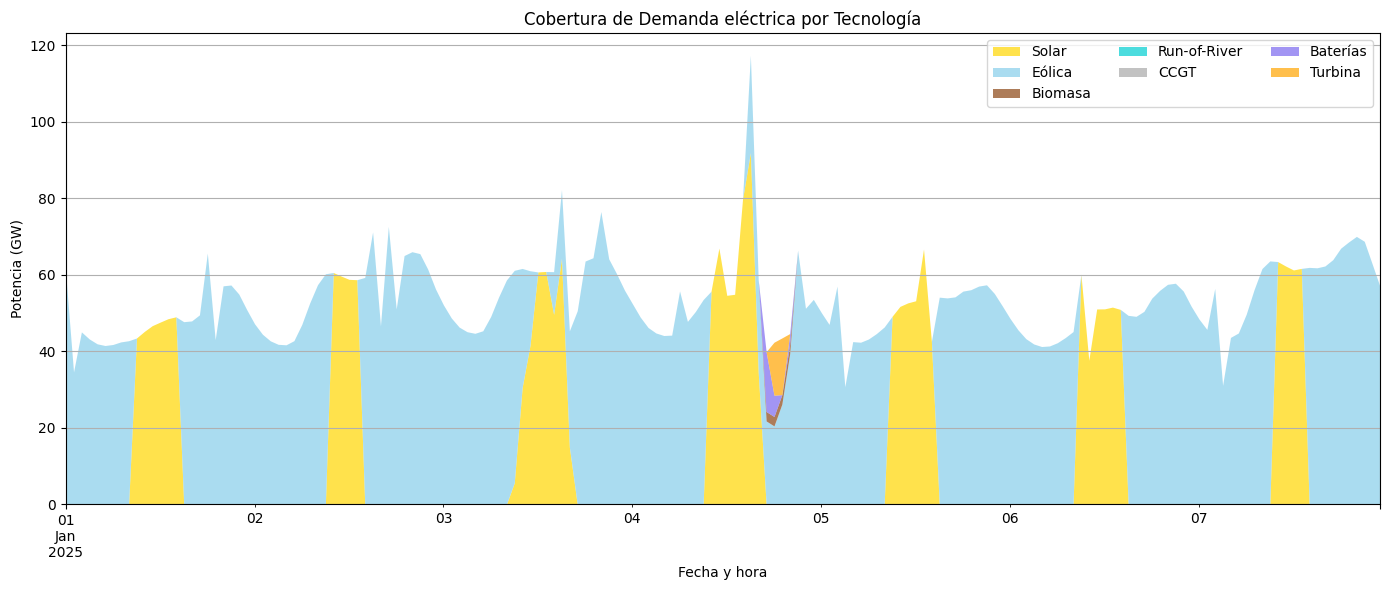

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 2) Index temporal
times = new_network.snapshots

# 3) Extrae generación de cada generator y asocia carriers
gen = new_network.generators_t.p                      # DataFrame (t × generators)
gen_car = new_network.generators["carrier"]           # Series generator → carrier

# 4) Construye series por carrier renovable
renew_carriers = ["Solar", "Wind", "Biomass", "Water", "Gas"]
renew_series = {
    car: gen.loc[:, gen_car == car].sum(axis=1)
    for car in renew_carriers
}

# 5) Extrae CCGT, Turbina y Baterías
ccgt   = -new_network.links_t.p1["CCGT"].clip(upper=0)
turb   = -new_network.links_t.p1["Turbina"].clip(upper=0)

# (o, si prefieres basarte en el nombre)
battery_sus = [n for n in new_network.storage_units.index if "battery" in n.lower()]
h2_sus      = [n for n in new_network.storage_units.index if "hstor"  in n.lower()]

# 7) Suma neta (descarga +, carga –)
bat_net = new_network.storage_units_t.p[battery_sus].sum(axis=1)
h2_net  = new_network.storage_units_t.p[h2_sus].sum(axis=1)

# 8) Descargas (oferta) 
battery_discharge = bat_net.clip(lower=0)
h2_discharge      = h2_net.clip(lower=0)

# 6) Monta el DataFrame final (en MW o GW dividiendo entre 1e3)
df_plot = pd.DataFrame({
    "Solar":         renew_series["Solar"]     / 1e3,
    "Eólica":        renew_series["Wind"]      / 1e3,
    "Biomasa":       renew_series["Biomass"]   / 1e3,
    "Run-of-River":  renew_series["Water"]/1e3,
    "CCGT":          ccgt   / 1e3,
    "Baterías":      battery_discharge/ 1e3,
   #  "H2 Storage":            h2_discharge / 1e3,
    "Turbina":       turb   / 1e3,
}, index=times)
# 7) Colores (ajusta a tu gusto)
colors = {
    "Solar":        "#FFD700",
    "Eólica":       "#87CEEB",
    "Biomasa":      "#8B4513",
    "Run-of-River": "#00CED1",
    "CCGT":         "#A9A9A9",
    "Baterías":     "#7B68EE",
    "Turbina":      "#FFA500",
   #  "H2 Storage":           "#32CD32",
}

c = [colors[col] for col in df_plot.columns]

# 8) Grafica área apilada
fig, ax = plt.subplots(figsize=(14, 6))
df_plot.plot(
    kind="area", ax=ax,
    color=c, alpha=0.7, linewidth=0
)
ax.set_title("Cobertura de Demanda eléctrica por Tecnología")
ax.set_xlabel("Fecha y hora")
ax.set_ylabel("Potencia (GW)")
ax.legend(loc="upper right", ncol=3)
ax.grid(True)
plt.tight_layout()
plt.show()



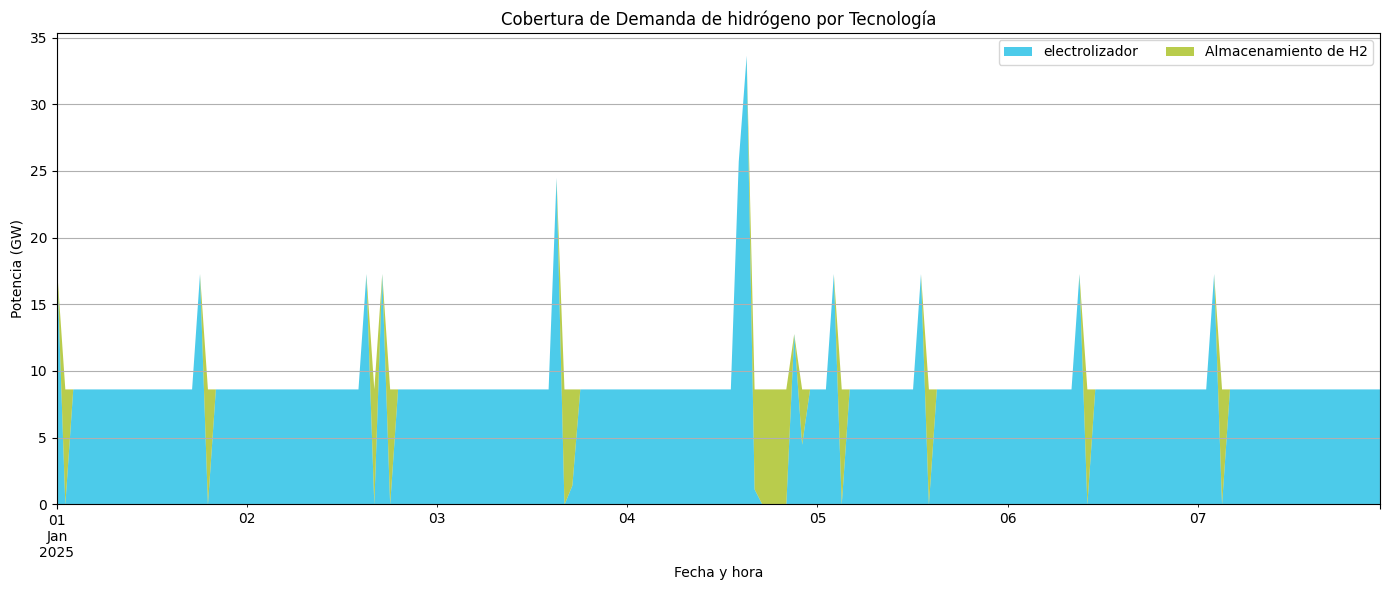

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 2) Index temporal
times = new_network.snapshots

# 3) Extrae generación de cada generator y asocia carriers
gen = new_network.generators_t.p                      # DataFrame (t × generators)
gen_car = new_network.generators["carrier"]           # Series generator → carrier

# 4) Construye series por carrier renovable
renew_carriers = ["Solar", "Wind", "Biomass", "Water", "Gas"]
renew_series = {
    car: gen.loc[:, gen_car == car].sum(axis=1)
    for car in renew_carriers
}

# 5) Extrae CCGT, Turbina y Baterías
ccgt   = -new_network.links_t.p1["CCGT"].clip(upper=0)
turb   = -new_network.links_t.p1["Turbina"].clip(upper=0)
electrolyzer = -new_network.links_t.p1["Electrolyzer"].clip(upper=0)

# (o, si prefieres basarte en el nombre)
battery_sus = [n for n in new_network.storage_units.index if "battery" in n.lower()]
h2_sus      = [n for n in new_network.storage_units.index if "hstor"  in n.lower()]

# 7) Suma neta (descarga +, carga –)
bat_net = new_network.storage_units_t.p[battery_sus].sum(axis=1)
h2_net  = new_network.storage_units_t.p[h2_sus].sum(axis=1)

# 8) Descargas (oferta) 
battery_discharge = bat_net.clip(lower=0)
h2_discharge      = h2_net.clip(lower=0)

# 6) Monta el DataFrame final (en MW o GW dividiendo entre 1e3)
df_plot = pd.DataFrame({
    "electrolizador":   electrolyzer / 1e3,
     "Almacenamiento de H2":            h2_discharge / 1e3,
}, index=times)
# 7) Colores (ajusta a tu gusto)
colors = {
    "electrolizador":   "#00B5E2",
     "Almacenamiento de H2":           "#9CB700",
}

c = [colors[col] for col in df_plot.columns]

# 8) Grafica área apilada
fig, ax = plt.subplots(figsize=(14, 6))
df_plot.plot(
    kind="area", ax=ax,
    color=c, alpha=0.7, linewidth=0
)
ax.set_title("Cobertura de Demanda de hidrógeno por Tecnología")
ax.set_xlabel("Fecha y hora")
ax.set_ylabel("Potencia (GW)")
ax.legend(loc="upper right", ncol=3)
ax.grid(True)
plt.tight_layout()
plt.show()



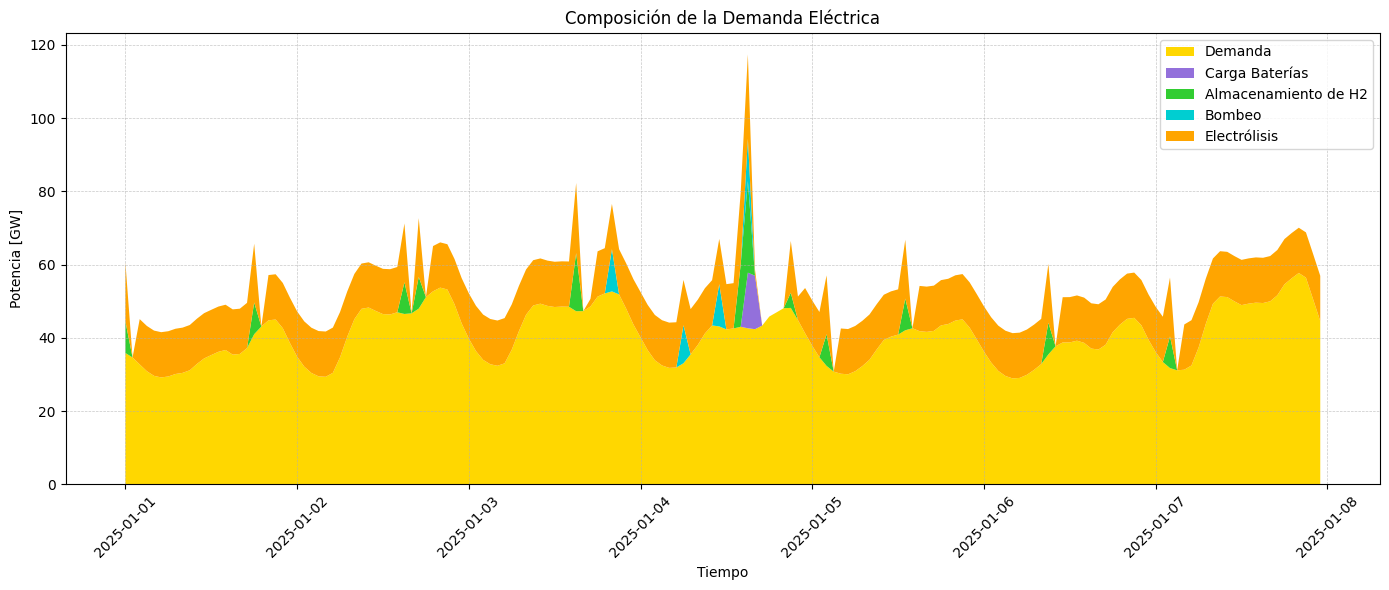

In [33]:
import matplotlib.pyplot as plt

# 1) Demanda nacional (MW → GW)
national_demand = new_network.loads_t.p_set["Demanda_Nacional"]/ 1e3

# 2) Carga de baterías (solo valores de carga → negativos en storage.p)
battery_sus = [n for n in new_network.storage_units.index if "battery" in n.lower()]
h2_sus      = [n for n in new_network.storage_units.index if "hstor"  in n.lower()]

battery_charge = (new_network.storage_units_t.p[battery_sus]
                  .clip(upper=0)
                  .sum(axis=1)
                  .abs() / 1e3)
h2_charge= (new_network.storage_units_t.p[h2_sus]
                  .clip(upper=0)
                  .sum(axis=1)
                  .abs() / 1e3)
# 3) Bombeo hidráulico (extracción de electricity → links_t.p0 positivo)
pumped_links = [l for l in new_network.links.index 
                if "pump" in l.lower() or "bombeo" in l.lower()]
pumping_demand = (new_network.links_t.p0[pumped_links]
                  .clip(lower=0)
                  .sum(axis=1) / 1e3)

# 4) Electrolysis (idem bombeo: consumo eléctrico en p0)
electrolyzer_links = [l for l in new_network.links.index 
                      if "electrolyzer" in l.lower()]
electrolyzer_demand = (new_network.links_t.p0[electrolyzer_links]
                       .clip(lower=0)
                       .sum(axis=1) / 1e3)
electrolyzer_demand_final=electrolyzer_demand- h2_charge
# 5) Plot apilado
plt.figure(figsize=(14, 6))
plt.stackplot(
    national_demand.index,
    national_demand,
    battery_charge,
    h2_charge,
    pumping_demand,
    electrolyzer_demand_final,
   labels=["Demanda", "Carga Baterías","Almacenamiento de H2", "Bombeo", "Electrólisis"],
   colors=[
        "#FFD700",  # Demanda (amarillo)
        "#9370DB",  # Carga Baterías (púrpura)
        "#32CD32",  # Carga H₂ (verde)  
        "#00CED1",  # Bombeo (cian)
        "#FFA500",  # Electrólisis (naranja)
   ],
    linewidth=0.5
)

plt.title("Composición de la Demanda Eléctrica")
plt.ylabel("Potencia [GW]")
plt.xlabel("Tiempo")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(loc="upper right", fontsize=10)
plt.tight_layout()
plt.show()


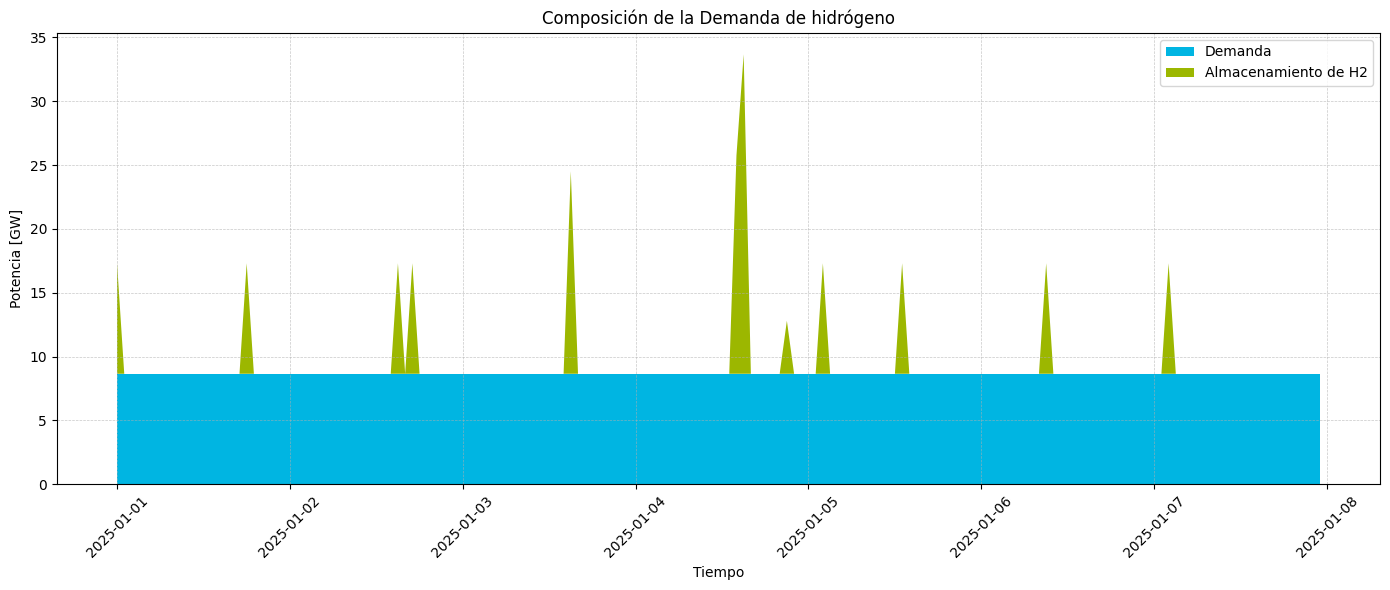

In [34]:
import matplotlib.pyplot as plt

# 1) Demanda nacional (MW → GW)
national_demand = new_network.loads_t.p_set["Demanda_Nacional"]/ 1e3
h2_demand = new_network.loads_t.p_set["Demand"]/ 1e3

# 2) Carga de baterías (solo valores de carga → negativos en storage.p)
battery_sus = [n for n in new_network.storage_units.index if "battery" in n.lower()]
h2_sus      = [n for n in new_network.storage_units.index if "hstor"  in n.lower()]

battery_charge = (new_network.storage_units_t.p[battery_sus]
                  .clip(upper=0)
                  .sum(axis=1)
                  .abs() / 1e3)
h2_charge= (new_network.storage_units_t.p[h2_sus]
                  .clip(upper=0)
                  .sum(axis=1)
                  .abs() / 1e3)
# 3) Bombeo hidráulico (extracción de electricity → links_t.p0 positivo)
pumped_links = [l for l in new_network.links.index 
                if "pump" in l.lower() or "bombeo" in l.lower()]
pumping_demand = (new_network.links_t.p0[pumped_links]
                  .clip(lower=0)
                  .sum(axis=1) / 1e3)

# 4) Electrolysis (idem bombeo: consumo eléctrico en p0)
electrolyzer_links = [l for l in new_network.links.index 
                      if "electrolyzer" in l.lower()]
electrolyzer_demand = (new_network.links_t.p0[electrolyzer_links]
                       .clip(lower=0)
                       .sum(axis=1) / 1e3)
electrolyzer_demand_final=electrolyzer_demand- h2_charge

# 5) Plot apilado
plt.figure(figsize=(14, 6))
plt.stackplot(
    national_demand.index,
    h2_demand,
    h2_charge,
   labels=["Demanda","Almacenamiento de H2"],
   colors=[
        "#00B5E2",  # Demanda (amarillo)
        "#9CB700",
   ],
    linewidth=0.5
   
)

plt.title("Composición de la Demanda de hidrógeno")
plt.ylabel("Potencia [GW]")
plt.xlabel("Tiempo")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(loc="upper right", fontsize=10)
plt.tight_layout()
plt.show()

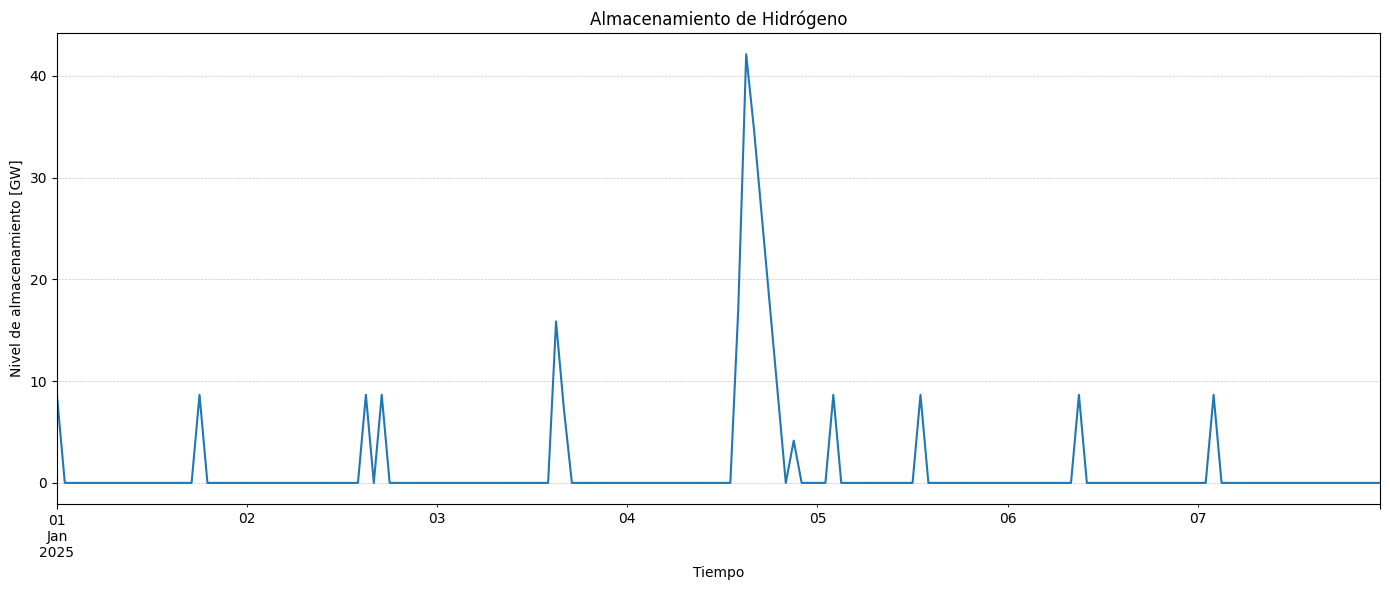

In [35]:
#creamos un grafico sobre el comportamiento del almacen de hidrogeno
import matplotlib.pyplot as plt
# Extraemos la serie de almacenamiento de hidrógeno
hydrogen_storage =new_network.storage_units_t.state_of_charge["Hstorage"] / 1e3 
# Graficamos el nivel de almacenamiento de hidrógeno
plt.figure(figsize=(14, 6))
hydrogen_storage.plot()
plt.title("Almacenamiento de Hidrógeno")
plt.ylabel("Nivel de almacenamiento [GW]")
plt.xlabel("Tiempo")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


bus
electricity_Market    3.463642
hydrogen_bus          0.865297
Name: 2025-01-01 01:00:00, dtype: float64

=== Resumen de Generación y Demanda ===
Hora: 2025-01-01 01:00:00
Demanda electricidad:   
Demanda nacional 34636.42189561268 -0.0 -0.0 0.0
Demanda H₂:             0.0 0.0
Generación en 2025-01-01 01:00:00 (MW):
name
Solar          -0.000000
Wind        34636.421896
Biomass        -0.000000
Gas            -0.000000
Water          -0.000000
Baterías        0.000000
Hstorage     8652.968037
Turbina        -0.000000
CCGT           -0.000000
Name: 2025-01-01 01:00:00, dtype: float64


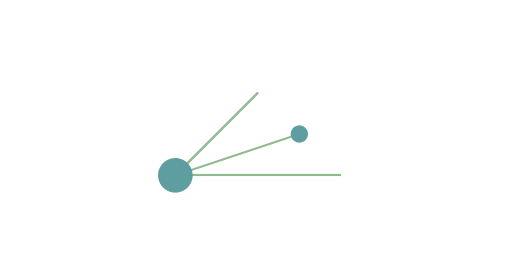

In [36]:
# 1) construyes una serie constante (o variable) para tu carga de H₂
h2_profile = pd.Series(
    8652.968037,                    # el valor fijo que tenías en la hoja
    index=new_network.snapshots    # idéntico índice de horas
)

# 3) tras hacer optimize(), ya tendrás en loads_t.p_set a ambos:
hora = pd.Timestamp("2025-01-01 01:00")
s = ( new_network.loads_t.p_set.loc[hora]
      .groupby(new_network.loads.bus)
      .sum()
    ) / 1e4

battery_sus = [n for n in new_network.storage_units.index if "battery" in n.lower()]
h2_sus      = [n for n in new_network.storage_units.index if "hstor"  in n.lower()]

# 1) Sacamos la serie de p de los StorageUnits en esa hora
p_su = new_network.storage_units_t.p["Battery"].loc[hora]
p_h_su = new_network.storage_units_t.p["Hstorage"].loc[hora]
# 2) Nos quedamos sólo con los valores negativos (carga)
p_charge = p_su[p_su < 0].sum()   # esto será un número NEGATIVO o cero
p_h_su_charge = p_h_su[p_h_su < 0].sum()   # esto será un número NEGATIVO o cero
print(s)
# electricity_Market    6.18016
# hydrogen_bus          0.86530

new_network.plot(margin=1, bus_sizes=s/100)



pumped_links = [l for l in new_network.links.index 
                if "pump" in l.lower() or "bombeo" in l.lower()]
pumping_demand = (new_network.links_t.p0[pumped_links]
                  .clip(lower=0)
                  .sum(axis=1) / 1e3)

gen_p   = new_network.generators_t.p.loc[hora].groupby(new_network.generators.bus).sum()
load_p  = new_network.loads_t.p_set.loc[hora].groupby(new_network.loads.bus).sum()
# le anñado la demanda de los links y storage units a la demanda de electricidad
load_p["Demanda nacional"] = new_network.loads_t.p_set["Demanda_Nacional"].loc[hora]
load_p["Pump"] = new_network.links_t.p0["Pump"].loc[hora]
load_p["Electrolyzer hydrogen"] =  new_network.links_t.p1["Electrolyzer"].loc[hora]
load_p["Electrolyzer electricidad"] =  new_network.links_t.p0["Electrolyzer"].loc[hora]

load_p["Baterías"] = p_charge
load_p["Hstorage"] = p_h_su_charge
print("\n=== Resumen de Generación y Demanda ===")
print("Hora:", hora)
print(f"Demanda electricidad:   ")
print( "Demanda nacional", load_p["Demanda nacional"], load_p["Pump"], load_p["Electrolyzer electricidad"], load_p["Baterías"])
print("Demanda H₂:            ", load_p["Electrolyzer hydrogen"], load_p["Hstorage"])
# 2) Saco la serie de generación de cada generator en ese instante:
gen_por_generador = new_network.generators_t.p.loc[hora]
# 3) añado como generacion las baterias y las turbinas
gen_por_generador["Baterías"] = new_network.storage_units_t.p["Battery"].loc[hora].sum()
gen_por_generador["Hstorage"] = new_network.storage_units_t.p["Hstorage"].loc[hora].sum()
gen_por_generador["Turbina"] = new_network.links_t.p0["Turbina"].loc[hora]
gen_por_generador["CCGT"] = new_network.links_t.p0["CCGT"].loc[hora]

print(f"Generación en {hora} (MW):")
print(gen_por_generador)


In [37]:
import pandas as pd

# 1) el timestamp que te interese
hora = pd.Timestamp("2025-01-04 23:00")
print(f"Hora seleccionada: {hora}")
#)generación eléctrica por bus
gen_p = ( new_network.generators_t.p
           .loc[hora]
           .groupby(new_network.generators.bus)
           .sum() )
print(f"Generación eléctrica por bus:\n{gen_p}")
# 2) demanda eléctrica “directa” (Loads) por bus
load_p = ( new_network.loads_t.p_set
           .loc[hora]
           .groupby(new_network.loads.bus)
           .sum() )

# 3) consumo de Links en cada bus (p0 sale de bus0)
link_cons  = ( new_network.links_t.p0
               .loc[hora]
               .groupby(new_network.links.bus0)
               .sum() )

# 4) inyección de Links en cada bus (p1 llega a bus1)
link_prod  = ( new_network.links_t.p1
               .loc[hora]
               .groupby(new_network.links.bus1)
               .sum() )

# 5) neto por bus = load + consumo_links – inyección_links
bus_balance = load_p \
    .add(link_cons,  fill_value=0) \
    .sub(link_prod,  fill_value=0)

print(bus_balance)
print(new_network.generators_t.p.loc[hora])


Hora seleccionada: 2025-01-04 23:00:00
Generación eléctrica por bus:
bus
electricity_Market    53597.275529
gas_bus                   0.000000
Name: 2025-01-04 23:00:00, dtype: float64
electricity_Market    53597.275529
gas_bus                   0.000000
hydrogen_bus          17305.936074
water_bus                 0.000000
Name: 2025-01-04 23:00:00, dtype: float64
name
Solar         -0.000000
Wind       53597.275529
Biomass       -0.000000
Gas           -0.000000
Water         -0.000000
Name: 2025-01-04 23:00:00, dtype: float64


In [38]:
s=new_network.statistics()
print(s)

                         Optimal Capacity  Installed Capacity        Supply    Withdrawal  Energy Balance Transmission  Capacity Factor   Curtailment  Capital Expenditure  Operational Expenditure       Revenue  Market Value
Generator   Biomass          2.462660e+03        2.462660e+03  9.850640e+03  0.000000e+00    9.850640e+03          0.0         0.023810  4.038762e+05                  0.0             1.379090e+05  6.644353e+05     67.450983
            Gas              1.000000e+14        1.000000e+14  0.000000e+00  0.000000e+00    0.000000e+00          0.0         0.000000  1.680000e+16                  0.0             0.000000e+00  0.000000e+00      0.000000
            Solar            2.238044e+05        2.238044e+05  2.153234e+06  0.000000e+00    2.153234e+06          0.0         0.057268  5.212615e+06                  0.0             0.000000e+00  5.997957e+04      0.027856
            Water            3.424666e+03        3.424666e+03  1.562072e+04  0.000000e+00    1.562072e+0